# BPT DIAGRAMS

## Dependencies

In [1]:
%matplotlib widget
import openpyxl
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd
from astropy.table import Table, QTable
import numpy as np
import emcee
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


## Import tables

In [2]:
cecilia = Table.read('mosfire.fits')
cecilia

<Table length=34>
LABEL          RA        ...       O3N2_ERR           Ne3O2_ERR      
bytes6      float64      ...       float64             float64       
------ ----------------- ... ------------------- --------------------
 BX537       356.6065305 ...  0.4412123915930824  0.10710467244593506
 BX348       356.6143693 ... 0.43547477911537935  0.22030801117307766
 RK120       356.6093603 ...  0.4422223930014271    1.216083115441326
 BX418       999.9999999 ...  0.4390357779604197 0.045364149046078155
 BX336       356.6231682 ...  0.4359769626396389                   --
 BX523       356.6464617 ... 0.43564202871988766  0.12364642876212376
 BX274       356.6090119 ... 0.44585425192720457  0.07718696122220252
 BX390       356.6030244 ... 0.44051083374595035  0.06967217065055498
 BX391       356.6170149 ... 0.43866227944569536  0.26938927373929694
   ...               ... ...                 ...                  ...
NB2089 356.6240833333333 ...                  --                   --
 BM118        356.584293 ...  0.8685889638065035   0.5318999393846748
 BX429       356.6052765 ... 0.44710820865525425   1.8318644083424622
 BX341       356.5967791 ...                  --                   --
 BM113        356.592698 ...  0.8685889638065035   0.5318999393846748
 fBM40       356.6373901 ... 0.44293985577913453   0.3579941738923358
  MD43       356.5853132 ...  0.8685889638065035   0.5318999393846748
 BX611       356.5888957 ...  0.8685889638065035   0.5318999393846748
 BM192       356.6084492 ...  0.8685889638065035   0.5318999393846748
   D27       356.6423519 ...  0.8685889638065035   0.5318999393846748

In [3]:
magE = pd.read_csv('master.csv')
magE

Unnamed: 0.1          ID     magE_RA  magE_DEC     sdss_RA  sdss_DEC  \
0              0  J0021+0052    5.254250  0.880031    5.254286  0.880023   
1              1  J0023-0948    5.915042 -9.813533    5.915093 -9.813522   
2              2  J0136-0037   24.127458 -0.632214   24.127474 -0.632222   
3              3  J0240-0828   40.217458 -8.474281   40.217500 -8.474285   
4              4  J0252+0114   43.142875  1.245539   43.142914  1.245542   
5              5  J0305+0040   46.396292  0.683122   46.396330  0.683104   
6              6  J0950+0042  147.597125  0.708125  147.597180  0.708133   
7              7  J1146+0053  176.705542  0.896136  176.705580  0.896104   
8              8  J1226+0415  186.549542  4.260019  186.549580  4.260018   
9              9  J1444+0409  221.172375  4.161592  221.172360  4.161592   
10            10  J1448-0110  222.022417 -1.182689  222.022420 -1.182700   
11            11  J1624-0022  246.042125 -0.367389  246.042140 -0.367383   
12            12  J2101-0555  315.309958 -5.919525  315.309970 -5.919530   
13            13  J2119+0052  319.992917  0.875986  319.992950  0.875979   
14            14  J2212+0006  333.179375  0.113486  333.179400  0.113483   
15            15  J2215+0002  333.846042  0.046331  333.846070  0.046320   
16            16  J2215-0011  336.292208 -0.198025  336.292200 -0.198011   
17            17  J2337-0010  354.466375 -0.166806  354.466370 -0.166820   

   sdss_data               SPECOBJID          RA       DEC  ...  log_M  \
0       sdss  b'439223316213950464 '    5.254286  0.880023  ...   9.06   
1       sdss  b'735339668748396544 '    5.915093 -9.813522  ...   8.49   
2       sdss  b'1691125637219117056'   24.127474 -0.632222  ...   7.79   
3       sdss  b'513494502204270592 '   40.217500 -8.474285  ...   7.87   
4       sdss  b'797248221209454592 '   43.142914  1.245542  ...   7.27   
5       sdss  b'798423599642863616 '   46.396330  0.683104  ...   8.09   
6       sdss  b'300731025703593984 '  147.597180  0.708133  ...   8.51   
7       sdss  b'318786936665827328 '  176.705580  0.896104  ...   7.65   
8       sdss  b'3242617920756410368'  186.549580  4.260018  ...   8.15   
9       sdss  b'661039343871223808 '  221.172360  4.161592  ...   6.83   
10      sdss  b'1035986009541601280'  222.022420 -1.182700  ...   7.89   
11      sdss  b'409879001813772288 '  246.042140 -0.367383  ...   8.27   
12      sdss  b'717307953417316352 '  315.309970 -5.919530  ...   8.99   
13      sdss  b'1111371552277948416'  319.992950  0.875979  ...   7.76   
14      sdss  b'1243114217410684928'  333.179400  0.113483  ...   8.34   
15      sdss  b'1243134008619984896'  333.846070  0.046320  ...   8.06   
16      sdss  b'422244936562272256 '  336.292200 -0.198011  ...   8.18   
17      sdss  b'767911057829160960 '  354.466370 -0.166820  ...   7.86   

    log_SFR     Av      ne    chi2 Age_Gyr_err log_M_err log_SFR_err   Av_err  \
0      1.49  0.890  320.82   0.007         3.0      0.29        0.07  0.15000   
1      0.67  0.930  507.99   3.527         2.1      0.06        0.04  0.00400   
2      0.03  0.929  539.32   1.960         3.0      0.13        0.05  0.01900   
3      0.62  0.780  478.82   0.910         3.0      0.22        0.11  0.29000   
4     -0.55  0.930  480.21   2.775         1.9      0.05        0.04  0.00200   
5      0.27  0.930  406.37   2.813         2.0      0.04        0.04  0.00100   
6      0.99  0.870  331.40   0.019         3.0      0.31        0.08  0.19000   
7     -0.09  0.930  495.52   2.892         3.0      0.15        0.05  0.04000   
8      0.68  0.790  348.67   0.063         3.0      0.31        0.11  0.28000   
9     -0.66  0.290  435.93   2.644         3.1      0.30        0.16  0.26000   
10     0.44  0.840  422.99   0.326         3.1      0.30        0.09  0.24000   
11     0.69  0.850  422.85   0.478         3.1      0.23        0.09  0.22000   
12     1.27  0.929  504.23   0.252         3.0      0.16        0.04  0.02500   
13    -0.07  0.930

In [4]:
SDSS_tab = pd.read_csv('sdss_contour.csv')
SDSS_tab

Unnamed: 0               SPECOBJID         RA        DEC         Z  \
0                0  b'299489676975171584 '  146.71420  -1.041304  0.021275   
1               11  b'299492700632147968 '  146.59271  -0.760256  0.065024   
2               14  b'299493525265868800 '  146.95000  -0.592202  0.064777   
3               15  b'299493800143775744 '  146.63167  -0.988278  0.052659   
4               16  b'299494075021682688 '  146.62857  -0.765137  0.064589   
...            ...                     ...        ...        ...       ...   
255733     1687034  b'3348600947461875712'  260.80057  31.898993  0.159622   
255734     1689036  b'2209036838541223936'  323.65753  11.419499  0.022039   
255735     1691126  b'2340813857859069952'  113.87165  20.676510  0.153932   
255736     1694805  b'2540053894080260096'  259.27480  40.845436  0.007029   
255737     1700850  b'3176265690608855040'  289.92734  38.479084  0.036611   

           Z_ERR  RELIABLE  PRIMTARGET  SECTARGET              TARGETTYPE  \
0       0.000009         1          96          0  b'GALAXY             '   
1       0.000011         1          64          0  b'GALAXY             '   
2       0.000008         1          64          0  b'GALAXY             '   
3       0.000009         1          64          0  b'GALAXY             '   
4       0.000016         1          64          0  b'GALAXY             '   
...          ...       ...         ...        ...                     ...   
255733  0.000023         1          64          0  b'GALAXY             '   
255734  0.000005         1           0          0  b'STAR_WHITE_DWARF   '   
255735  0.000008         1           0          0  b'SERENDIPITY_BLUE   '   
255736  0.000006         1           0          0  b'STAR_WHITE_DWARF   '   
255737  0.000008         1           0          0  b'SERENDIPITY_FIRST  '   

        ...     R23_S     R23_S_ERR    R3N2_S    R3N2_S_ERR    O3N2_S  \
0       ...  0.652912  1.361917e-12 -0.454587  2.487868e-12  0.215466   
1       ...  0.211429  5.711598e-13 -0.689739  8.970261e-13 -0.090192   
2       ...  0.441478  6.624220e-13 -0.298521  9.468429e-13  0.275892   
3       ...  0.537230  4.379429e-13  0.110740  5.414616e-13  0.612715   
4       ...  0.560204  5.919749e-13 -0.452893  9.904461e-13  0.125484   
...     ...       ...           ...       ...           ...       ...   
255733  ...  0.875362  5.198984e-13 -0.268364  1.150517e-12  0.295272   
255734  ...       NaN  6.203933e-11  1.123886  2.321345e-12  1.632982   
255735  ...  0.670120  2.531892e-13  0.397835  3.562969e-13  0.956641   
255736  ... -0.410964  9.876069e-13 -0.610069  1.184897e-12 -0.046726   
255737  ...  0.380880  2.054946e-13 -0.582948  3.118886e-13  0.068752   

        O3N2_S_ERR     Ne3O2  Ne3O2_err      S2_S      S2_S_ERR  
0         0.055268       NaN   2.977104 -0.345632  5.786449e-13  
1         0.087493 -0.889283   0.273816 -0.479489  2.143566e-13  
2         0.053134       NaN   0.284331 -0.482621  2.372088e-13  
3         0.053030 -0.882639   0.157125 -0.392920  1.470663e-13  
4         0.103173 -1.515070   1.008284 -0.285281  2.063007e-13  
...            ...       ...        ...       ...           ...  
255733    0.114928 -1.695389   0.544752 -0.089919  2.957998e-13  
255734    0.005153       NaN   0.016844 -0.746564  1.504655e-12  
255735    0.017380 -1.439197   0.066898 -0.460081  1.321015e-13  
255736    0.027824       inf        inf -0.489640  4.552486e-13  
255737    0.015420 -1.574309   0.218720 -0.402853  8.505427e-14  

[255738 rows x 325 columns]

In [5]:
sdss_bpt = pd.read_csv('sdss_bpt.csv')
sdss_bpt

Unnamed: 0               SPECOBJID         RA        DEC         Z  \
0           200  b'299544652556560384 '  145.59656  -1.205323  0.147300   
1           437  b'299609798620506112 '  145.77515   0.320216  0.024945   
2           848  b'299546852049577984 '  145.59656  -1.205323  0.147311   
3          1077  b'299609799090268160 '  145.77515   0.320216  0.024923   
4          1700  b'300731025703593984 '  147.59718   0.708133  0.097702   
..          ...                     ...        ...        ...       ...   
867     1676888  b'3330436464944113664'  150.11852  31.107168  0.152044   
868     1677307  b'3330551638787123200'  150.14333  32.794260  0.085084   
869     1678621  b'3332812784600639488'  131.29861  32.864983  0.248522   
870     1679133  b'3333903499950843904'  139.40865  33.660843  0.172900   
871     1683253  b'3342811743763064832'  245.68110  16.605580  0.149523   

        Z_ERR  RELIABLE  PRIMTARGET  SECTARGET              TARGETTYPE  ...  \
0    0.000008         1           4          0  b'QSO                '  ...   
1    0.000005         1          64          0  b'GALAXY             '  ...   
2    0.000007         1           4          0  b'QSO                '  ...   
3    0.000005         1          64          0  b'GALAXY             '  ...   
4    0.000006         1           4          0  b'QSO                '  ...   
..        ...       ...         ...        ...                     ...  ...   
867  0.000008         1           0          0  b'QSO                '  ...   
868  0.000005         1           0          0  b'QSO                '  ...   
869  0.000006         1           0          0  b'QSO                '  ...   
870  0.000009         1           0          0  b'QSO                '  ...   
871  0.000007         1           2          0  b'QSO                '  ...   

    SPECSFR_FIB_P97P5 SPECSFR_FIB_ENTROPY  OIII_5007_SNR NII_6584_SNR  \
0           -7.321795           -4.371980     128.481700    71.950700   
1           -7.800000           -3.212024     128.124620    27.151220   
2           -7.398412           -4.232412     123.508200    72.766365   
3           -7.878676           -3.120382     141.823730    33.722195   
4           -7.005952           -4.715830     155.787580    72.113160   
..                ...                 ...            ...          ...   
867      -9999.000000        -9999.000000      90.408720    11.383203   
868      -9999.000000        -9999.000000     121.838820    16.269897   
869      -9999.000000        -9999.000000     166.525530    32.061905   
870         -6.005000           -0.811278      62.925396    36.154530   
871         -7.119642           -4.064278     129.472920    61.556960   

     H_ALPHA_SNR  H_BETA_SNR      R3_S      N2_S  R3_S_ERR  N2_S_ERR  
0     123.223755   21.175798  0.597775 -0.831151  0.020786  0.006990  
1     102.013435   90.969990  0.824988 -1.601443  0.005855  0.016552  
2     125.919890   15.048203  0.542084 -0.836539  0.029074  0.006893  
3     136.211180   95.324490  0.820869 -1.625511  0.005489  0.013267  
4     164.318790  114.017190  0.739335 -1.248647  0.004720  0.006577  
..           ...         ...       ...       ...       ...       ...  
867    88.855675   51.230198  0.721958 -1.434506  0.009744  0.038464  
868   119.594290   57.445140  0.748517 -1.456817  0.008358  0.026939  
869   125.484750   94.418915  0.688708 -1.152202  0.005288  0.013981  
870   107.582910   32.031506  0.466732 -0.687741  0.015214  0.012672  
871   139.947660   79.681940  0.649528 -0.918050  0.006400  0.007708  

[872 rows x 307 columns]

## Compare CECILIA VS MAGE

In [318]:
def steidel(x):
    return 0.66 / (x - 0.31) + 1.14 -0.05

def kewley(x):
    return 0.61 / (x - 0.47) + 1.19

In [319]:
A = ~((cecilia['FO3N'][:, 1] == 0.) | (cecilia['FO3N'][:, 1] == 99.0))
B = ~((cecilia['FN2'][:, 1] == 0.) | (cecilia['FN2'][:, 1] == 99.0))
C = ~((cecilia['FHA'] == 0.) | (cecilia['FHA'] == 99.0))
D = ~((cecilia['FHB'] == 0.) | (cecilia['FHB'] == 99.0))
mask_ceci = (A & B & C & D)

In [320]:
cecilia = cecilia[mask_ceci]

In [321]:
def bpt_plots(mag_x, mag_y, mag_xerr, mag_yerr,
              mos_x, mos_y, mos_xerr, mos_yerr,
              full_sdss_x, full_sdss_y, namex, namey):

    fig, ax = plt.subplots(1, 1, figsize=(8,8))

    nan_mask = ~( np.isnan(full_sdss_x) | np.isinf(full_sdss_x) |
                np.isnan(full_sdss_y) | np.isinf(full_sdss_y))

    H, xedges, yedges = np.histogram2d(full_sdss_x[nan_mask],
                                       full_sdss_y[nan_mask],
                                       bins=150)
    H_flat = H.flatten()
    H_sorted = np.sort(H_flat)[::-1]
    H_cumsum = np.cumsum(H_sorted)
    H_cumsum_normalized = H_cumsum / H_cumsum[-1]
    level_90 = H_sorted[np.searchsorted(H_cumsum_normalized, 0.9)]
    levels = np.logspace(np.log10(level_90), np.log10(H.max()), 10)
    ax.contour(H.T, levels=levels, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], colors='#5E4140')
    ax.scatter(full_sdss_x[nan_mask], full_sdss_y[nan_mask],
                alpha=0.05, s=1, c='grey')

    mage_mass = magE['log_M']

    ax.scatter(mag_x, mag_y, s=2 * mage_mass,
                         c='coral')

    ax.errorbar(mag_x, mag_y, xerr=mag_xerr,
                 yerr=mag_yerr, fmt='o', c='coral', ecolor='black',
                ms=2, capsize=3,
                label='MagE')

    mos_mass = cecilia['LMSTAR']
    mask = (mos_mass == 0.0) | (mos_mass == 99.0)

    ax.errorbar(mos_x[mask], mos_y[mask], xerr=mos_xerr[mask],
        yerr=mos_yerr[mask], fmt='o', c='cyan', ecolor='black',
        ms=2, capsize=3, label='MOSFIRE no mass', elinewidth=1)

    ax.scatter(mos_x[~mask], mos_y[~mask], s=2 * mos_mass[~mask],
                         c='blue')

    ax.errorbar(mos_x[~mask], mos_y[~mask], xerr=mos_xerr[~mask],
                yerr=mos_yerr[~mask], fmt='o', c='blue', ecolor='black',
                ms=2, capsize=3, label='MOSFIRE', elinewidth=1)

    ax.set_ylim(-1., 1.)
    ax.set_xlim(-1.75, 0.5)
    ax.set_xlabel(namex)
    ax.set_ylabel(namey)
    plt.legend(markerscale=2, frameon=False, bbox_to_anchor=(0.03, 0.03),loc='lower left', borderaxespad=0)

    ax.minorticks_on()
    ax.tick_params(which='major', length=10, width=1.2, direction='in')
    ax.tick_params(which='minor', length=5, width=1.2, direction='in')
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')

    plt.show()

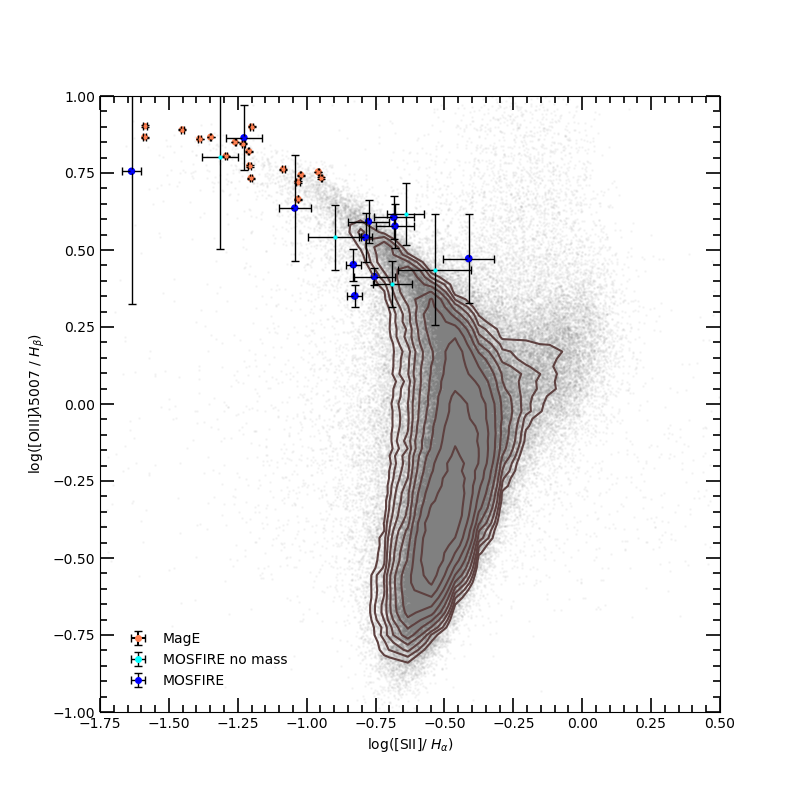

In [322]:
bpt_plots(magE.S2.values, magE.R3.values,magE.S2_err.values, magE.R3_err.values,
         cecilia['S2'], cecilia['R3'], cecilia['R3_ERR'], cecilia['S2_ERR'],
         SDSS_tab['S2_S'], SDSS_tab['R3_S'],
         r'log([SII]/ $H_{\alpha}$)',
         r'log([OIII]$\lambda$5007 / $H_{\beta}$)')

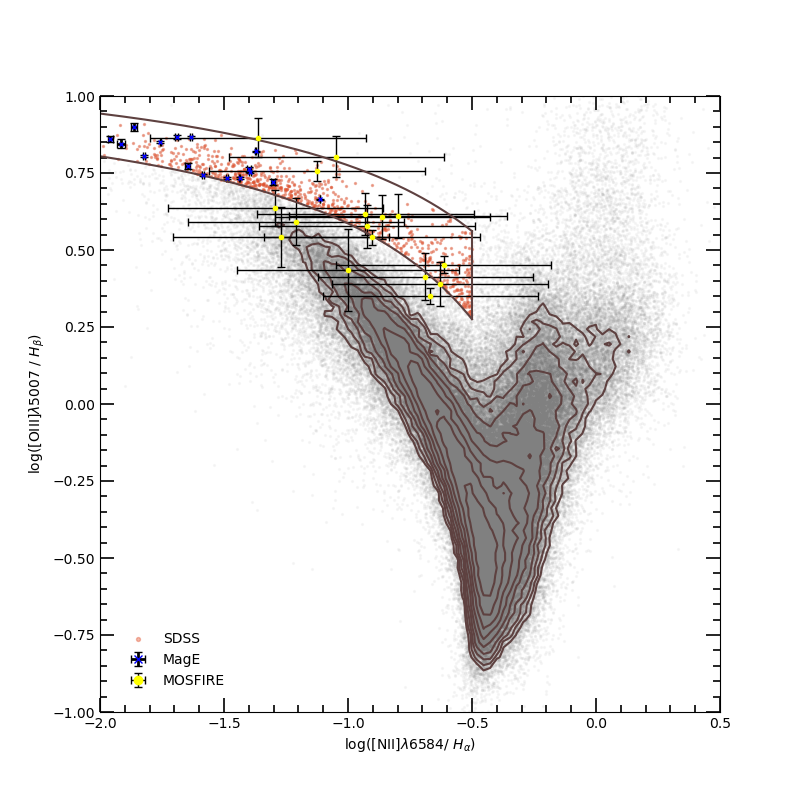

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
contour = True
compare= True
if contour is True:
    H, xedges, yedges = np.histogram2d(SDSS_tab['N2_S'], SDSS_tab['R3_S'], bins=150)
    H_flat = H.flatten()
    H_sorted = np.sort(H_flat)[::-1]
    H_cumsum = np.cumsum(H_sorted)
    H_cumsum_normalized = H_cumsum / H_cumsum[-1]
    level_90 = H_sorted[np.searchsorted(H_cumsum_normalized, 0.9)]
    levels = np.logspace(np.log10(level_90), np.log10(H.max()), 10)
    ax.contour(H.T, levels=levels, extent=[xedges[0], xedges[-1], yedges[0],
                                           yedges[-1]],
               colors='#5E4140')

    ax.scatter(SDSS_tab['N2_S'], SDSS_tab['R3_S'], alpha=0.05, s=2, c='grey')

if compare is True:
    ax.scatter(sdss_bpt['N2_S'], sdss_bpt['R3_S'],
                s=2, color='#e2532f', alpha=0.4, label='SDSS')

#ax.scatter(magE.N2, magE.R3, s=5, color='#00C50A', label='MagE')
ax.errorbar(magE.N2, magE.R3, xerr=magE.N2_err, yerr=magE.N2_err, fmt='x',
            c='blue', ecolor='black',  elinewidth=2,
            ms=3, capsize=3, label='MagE')
#ax.plot(FN2, FR3, ms=5, ls='None', color='#012CC8', label='MOSFIRE', marker='x')
ax.errorbar(cecilia['N2'], cecilia['R3'], xerr=cecilia['N2_ERR'], yerr=cecilia['R3_ERR'],
            fmt='o', c='yellow', ecolor='black',
             elinewidth=1, ms=3, capsize=3, label='MOSFIRE')

x = np.linspace(-2.5, -0.5, 1900)
ax.plot(x, steidel(x), color='#5E4140')
ax.plot(x, kewley(x), color='#5E4140' )
ax.plot((-0.5, -0.5), (np.min(kewley(x)), np.min(steidel(x))), color='#5E4140')

ax.set_ylim(-1., 1.)
ax.set_xlim(-2., 0.5)
ax.set_xlabel(r'log([NII]$\lambda$6584/ $H_{\alpha}$)')
ax.set_ylabel(r'log([OIII]$\lambda$5007 / $H_{\beta}$)')
plt.legend(markerscale=2, frameon=False, bbox_to_anchor=(0.03, 0.03),
           loc='lower left', borderaxespad=0)

ax.minorticks_on()
ax.tick_params(which='major', length=10, width=1.2, direction='in')
ax.tick_params(which='minor', length=5, width=1.2, direction='in')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.show()

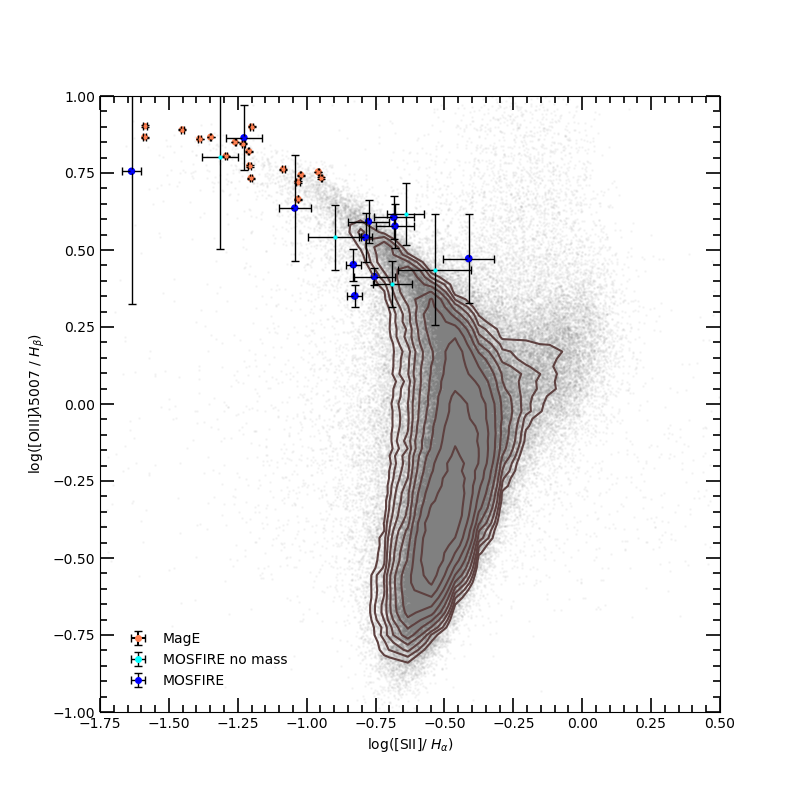

In [323]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
contour = True
compare = False
nan_mask = ~( np.isnan(SDSS_tab['S2_S']) | np.isinf(SDSS_tab['S2_S']) )
if contour is True:
    H, xedges, yedges = np.histogram2d(SDSS_tab['S2_S'][nan_mask],
                                       SDSS_tab['R3_S'][nan_mask],
                                       bins=150)
    H_flat = H.flatten()
    H_sorted = np.sort(H_flat)[::-1]
    H_cumsum = np.cumsum(H_sorted)
    H_cumsum_normalized = H_cumsum / H_cumsum[-1]
    level_90 = H_sorted[np.searchsorted(H_cumsum_normalized, 0.9)]
    levels = np.logspace(np.log10(level_90), np.log10(H.max()), 10)
    ax.contour(H.T, levels=levels, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], colors='#5E4140')
    ax.scatter(SDSS_tab['S2_S'][nan_mask], SDSS_tab['R3_S'][nan_mask],
                alpha=0.05, s=1, c='grey')

if compare is True:
    ax.scatter(sdss_bpt['N2_S'], sdss_bpt['R3_S'],
                s=0.5, color='#e2532f', alpha=0.4, label='SDSS')

mage_mass = magE['log_M']

ax.scatter(magE.S2.values, magE.R3.values, s=2 * mage_mass,
                     c='coral')

ax.errorbar(magE.S2.values, magE.R3.values, xerr=magE.S2_err.values,
             yerr=magE.R3_err.values, fmt='o', c='coral', ecolor='black',
            ms=2, capsize=3,
            label='MagE')


mos_mass = cecilia['LMSTAR']
mask = (mos_mass == 0.0) | (mos_mass == 99.0)

ax.errorbar(cecilia['S2'][mask], cecilia['R3'][mask], xerr=cecilia['R3_ERR'][mask],
    yerr=cecilia['S2_ERR'][mask], fmt='o', c='cyan', ecolor='black',
    ms=2, capsize=3, label='MOSFIRE no mass', elinewidth=1)

ax.scatter(cecilia['S2'][~mask], cecilia['R3'][~mask], s=2 * mos_mass[~mask],
                     c='blue')

ax.errorbar(cecilia['S2'][~mask], cecilia['R3'][~mask], xerr=cecilia['R3_ERR'][~mask],
            yerr=cecilia['S2_ERR'][~mask], fmt='o', c='blue', ecolor='black',
            ms=2, capsize=3, label='MOSFIRE', elinewidth=1)

ax.set_ylim(-1., 1.)
ax.set_xlim(-1.75, 0.5)
ax.set_xlabel(r'log([SII]/ $H_{\alpha}$)')
ax.set_ylabel(r'log([OIII]$\lambda$5007 / $H_{\beta}$)')
plt.legend(markerscale=2, frameon=False, bbox_to_anchor=(0.03, 0.03),loc='lower left', borderaxespad=0)

ax.minorticks_on()
ax.tick_params(which='major', length=10, width=1.2, direction='in')
ax.tick_params(which='minor', length=5, width=1.2, direction='in')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

plt.show()

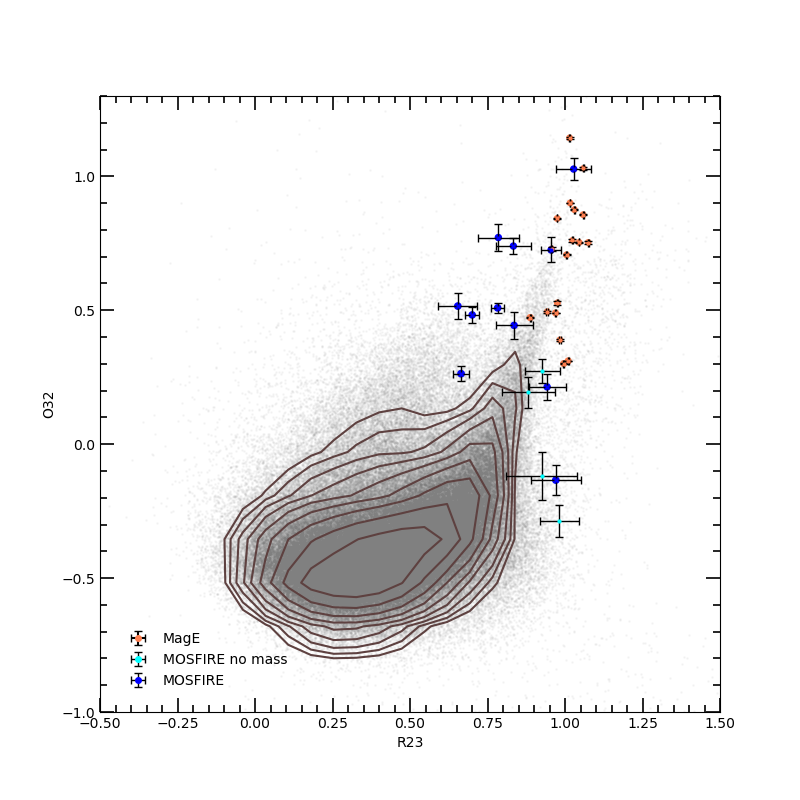

In [324]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
contour = True
nan_mask = ~( np.isnan(SDSS_tab['R23_S']) | np.isinf(SDSS_tab['R23_S']) |
            np.isnan(SDSS_tab['O32_S']) | np.isinf(SDSS_tab['O32_S']))
if contour is True:
    H, xedges, yedges = np.histogram2d(SDSS_tab['R23_S'][nan_mask],
                                       SDSS_tab['O32_S'][nan_mask],
                                       bins=150)
    H_flat = H.flatten()
    H_sorted = np.sort(H_flat)[::-1]
    H_cumsum = np.cumsum(H_sorted)
    H_cumsum_normalized = H_cumsum / H_cumsum[-1]
    level_90 = H_sorted[np.searchsorted(H_cumsum_normalized, 0.9)]
    levels = np.logspace(np.log10(level_90), np.log10(H.max()), 10)
    ax.contour(H.T, levels=levels, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], colors='#5E4140')
    ax.scatter(SDSS_tab['R23_S'][nan_mask], SDSS_tab['O32_S'][nan_mask],
                alpha=0.05, s=1, c='grey')


mage_mass = magE['log_M']

ax.scatter(magE.R23.values, magE.O3O2.values, s=2 * mage_mass,
                     c='coral')

ax.errorbar(magE.R23.values, magE.O3O2.values, xerr=magE.R23_err.values,
             yerr=magE.O3O2_err.values, fmt='o', c='coral', ecolor='black',
            ms=2, capsize=3,
            label='MagE')


mos_mass = cecilia['LMSTAR']
mask = (mos_mass == 0.0) | (mos_mass == 99.0)

ax.errorbar(cecilia['R23'][mask], cecilia['O32'][mask], xerr=cecilia['R23_ERR'][mask],
            yerr=cecilia['O32_ERR'][mask], fmt='o', c='cyan', ecolor='black',
    ms=2, capsize=3, label='MOSFIRE no mass', elinewidth=1)

ax.scatter(cecilia['R23'][~mask], cecilia['O32'][~mask], s=2 * mos_mass[~mask],
                     c='blue')

ax.errorbar(cecilia['R23'][~mask], cecilia['O32'][~mask], xerr=cecilia['R23_ERR'][~mask],
            yerr=cecilia['O32_ERR'][~mask], fmt='o', c='blue', ecolor='black',
            ms=2, capsize=3, label='MOSFIRE', elinewidth=1)


ax.set_ylim(-1., 1.3)
ax.set_xlim(-0.5, 1.5)
ax.set_xlabel(r'R23')
ax.set_ylabel(r'O32')
plt.legend(markerscale=2, frameon=False, bbox_to_anchor=(0.03, 0.03),loc='lower left', borderaxespad=0)

ax.minorticks_on()
ax.tick_params(which='major', length=10, width=1.2, direction='in')
ax.tick_params(which='minor', length=5, width=1.2, direction='in')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

plt.show()

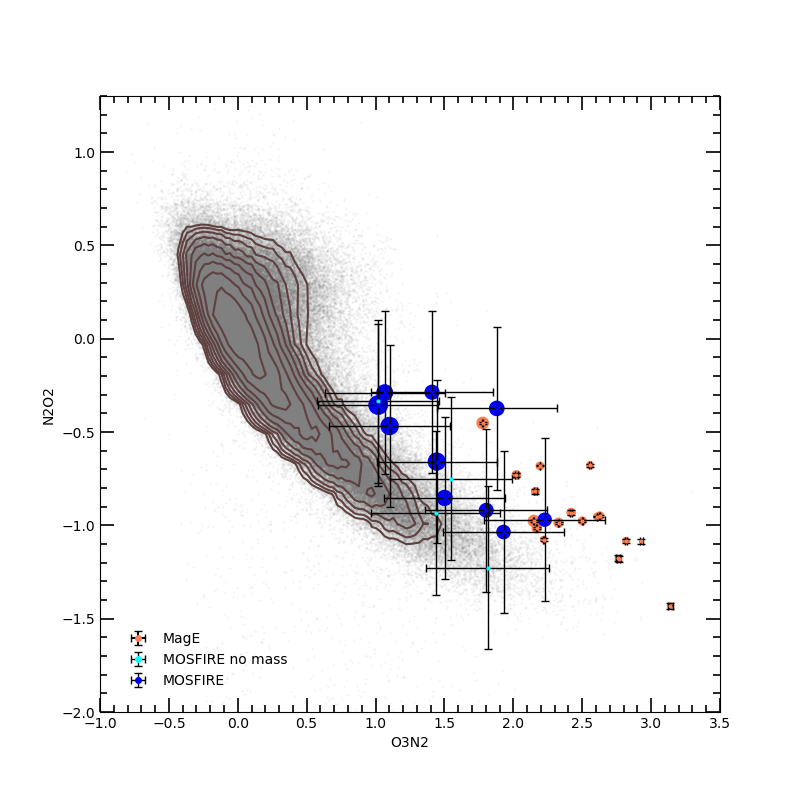

In [384]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
contour = True
nan_mask = ~( np.isnan(SDSS_tab['O3N2_S']) | np.isinf(SDSS_tab['O3N2_S']) |
            np.isnan(SDSS_tab['N2O2_S']) | np.isinf(SDSS_tab['N2O2_S']))
if contour is True:
    H, xedges, yedges = np.histogram2d(SDSS_tab['O3N2_S'][nan_mask],
                                       SDSS_tab['N2O2_S'][nan_mask],
                                       bins=150)
    H_flat = H.flatten()
    H_sorted = np.sort(H_flat)[::-1]
    H_cumsum = np.cumsum(H_sorted)
    H_cumsum_normalized = H_cumsum / H_cumsum[-1]
    level_90 = H_sorted[np.searchsorted(H_cumsum_normalized, 0.9)]
    levels = np.logspace(np.log10(level_90), np.log10(H.max()), 10)
    ax.contour(H.T, levels=levels, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], colors='#5E4140')
    ax.scatter(SDSS_tab['O3N2_S'][nan_mask], SDSS_tab['N2O2_S'][nan_mask],
                alpha=0.05, s=1, c='grey')


mage_mass = magE['log_M']

ax.scatter(magE.O3N2.values, magE.N2O2.values, s=(mage_mass - 5) ** 3,
                     c='coral')

ax.errorbar(magE.O3N2.values, magE.N2O2.values, xerr=magE.O3N2_err.values,
             yerr=magE.N2O2_err.values, fmt='o', c='coral', ecolor='black',
            ms=2, capsize=3,
            label='MagE')


mos_mass = cecilia['LMSTAR']
mask = (mos_mass == 0.0) | (mos_mass == 99.0)

ax.errorbar(cecilia['O3N2'][mask], cecilia['N202'][mask], xerr=cecilia['O3N2_ERR'][mask],
            yerr=cecilia['N2O2_ERR'][mask], fmt='o', c='cyan', ecolor='black',
    ms=2, capsize=3, label='MOSFIRE no mass', elinewidth=1)

ax.scatter(cecilia['O3N2'][~mask], cecilia['N202'][~mask], s=(mos_mass[~mask] - 5) ** 3,
                     c='blue')

ax.errorbar(cecilia['O3N2'][~mask], cecilia['N202'][~mask], xerr=cecilia['O3N2_ERR'][~mask],
            yerr=cecilia['N2O2_ERR'][~mask], fmt='o', c='blue', ecolor='black',
            ms=2, capsize=3, label='MOSFIRE', elinewidth=1)

ax.set_ylim(-2., 1.3)
ax.set_xlim(-1, 3.5)
ax.set_xlabel(r'O3N2')
ax.set_ylabel(r'N2O2')
plt.legend(markerscale=2, frameon=False, bbox_to_anchor=(0.03, 0.03),loc='lower left', borderaxespad=0)

ax.minorticks_on()
ax.tick_params(which='major', length=10, width=1.2, direction='in')
ax.tick_params(which='minor', length=5, width=1.2, direction='in')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

plt.show()

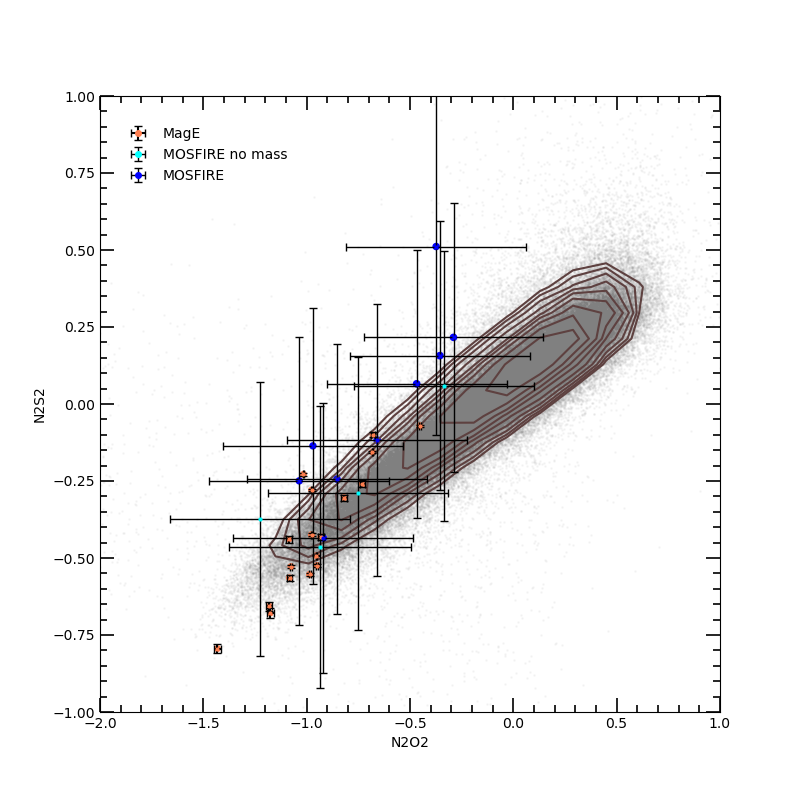

In [334]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
contour = True
nan_mask = ~( np.isnan(SDSS_tab['N2S2_S']) | np.isinf(SDSS_tab['N2S2_S']) |
            np.isnan(SDSS_tab['N2O2_S']) | np.isinf(SDSS_tab['N2O2_S']))
if contour is True:
    H, xedges, yedges = np.histogram2d(SDSS_tab['N2O2_S'][nan_mask],
                                       SDSS_tab['N2S2_S'][nan_mask],
                                       bins=150)
    H_flat = H.flatten()
    H_sorted = np.sort(H_flat)[::-1]
    H_cumsum = np.cumsum(H_sorted)
    H_cumsum_normalized = H_cumsum / H_cumsum[-1]
    level_90 = H_sorted[np.searchsorted(H_cumsum_normalized, 0.9)]
    levels = np.logspace(np.log10(level_90), np.log10(H.max()), 10)
    ax.contour(H.T, levels=levels, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], colors='#5E4140')
    ax.scatter(SDSS_tab['N2O2_S'][nan_mask], SDSS_tab['N2S2_S'][nan_mask],
                alpha=0.05, s=1, c='grey')


mage_mass = magE['log_M']

ax.scatter(magE.N2O2.values, magE.N2S2.values, s=2 * mage_mass,
                     c='coral')

ax.errorbar(magE.N2O2.values, magE.N2S2.values, xerr=magE.N2O2_err.values,
             yerr=magE.N2S2_err.values, fmt='o', c='coral', ecolor='black',
            ms=2, capsize=3,
            label='MagE')


mos_mass = cecilia['LMSTAR']
mask = (mos_mass == 0.0) | (mos_mass == 99.0)

ax.errorbar(cecilia['N202'][mask], cecilia['N2S2'][mask], xerr=cecilia['N2O2_ERR'][mask],
            yerr=cecilia['N2S2_ERR'][mask], fmt='o', c='cyan', ecolor='black',
            ms=2, capsize=3, label='MOSFIRE no mass', elinewidth=1)

ax.scatter(cecilia['N202'][~mask], cecilia['N2S2'][~mask], s=2 * mos_mass[~mask],
                     c='blue')

ax.errorbar(cecilia['N202'][~mask], cecilia['N2S2'][~mask], xerr=cecilia['N2O2_ERR'][~mask],
            yerr=cecilia['N2S2_ERR'][~mask], fmt='o', c='blue', ecolor='black',
            ms=2, capsize=3, label='MOSFIRE', elinewidth=1)



ax.set_ylim(-1., 1.)
ax.set_xlim(-2, 1)
ax.set_xlabel(r'N2O2')
ax.set_ylabel(r'N2S2')
plt.legend(markerscale=2, frameon=False, bbox_to_anchor=(0.03, 0.85),loc='lower left', borderaxespad=0)

ax.minorticks_on()
ax.tick_params(which='major', length=10, width=1.2, direction='in')
ax.tick_params(which='minor', length=5, width=1.2, direction='in')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

plt.show()

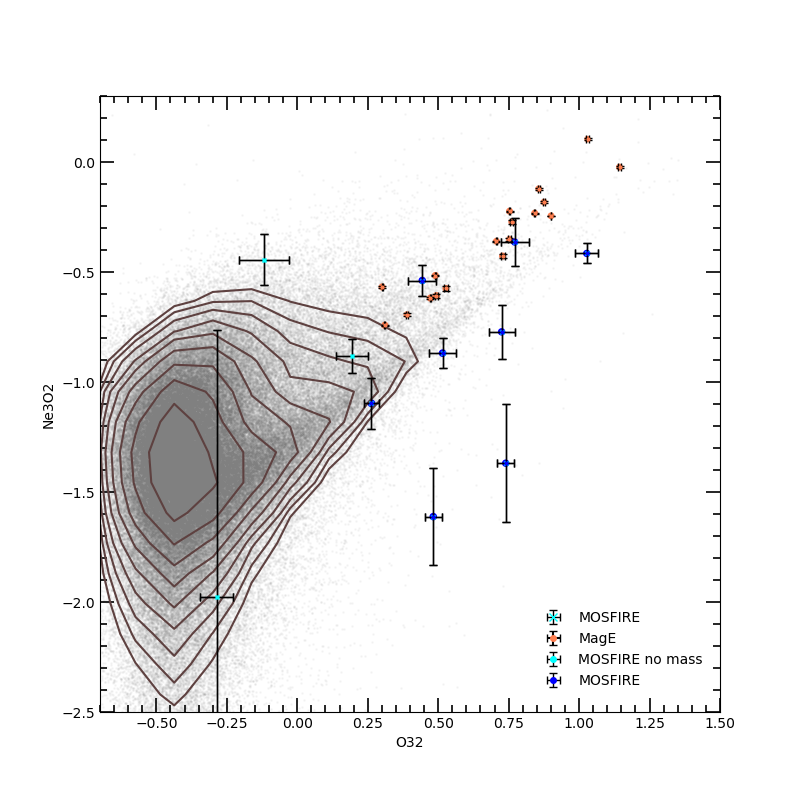

In [336]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
contour = True
nan_mask = ~( np.isnan(SDSS_tab['O32_S']) | np.isinf(SDSS_tab['O32_S']) |
            np.isnan(SDSS_tab['Ne3O2_S']) | np.isinf(SDSS_tab['Ne3O2_S']))
if contour is True:
    H, xedges, yedges = np.histogram2d(SDSS_tab['O32_S'][nan_mask],
                                       SDSS_tab['Ne3O2_S'][nan_mask],
                                       bins=150)
    H_flat = H.flatten()
    H_sorted = np.sort(H_flat)[::-1]
    H_cumsum = np.cumsum(H_sorted)
    H_cumsum_normalized = H_cumsum / H_cumsum[-1]
    level_90 = H_sorted[np.searchsorted(H_cumsum_normalized, 0.9)]
    levels = np.logspace(np.log10(level_90), np.log10(H.max()), 10)
    ax.contour(H.T, levels=levels, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], colors='#5E4140')
    ax.scatter(SDSS_tab['O32_S'][nan_mask], SDSS_tab['Ne3O2_S'][nan_mask],
                alpha=0.05, s=1, c='grey')


ax.errorbar(cecilia['O32'], cecilia['Ne3O2'], xerr=cecilia['O32_ERR'],
            yerr=cecilia['Ne3O2_ERR'], fmt='x', c='cyan', ecolor='black',
            ms=3, capsize=3, label='MOSFIRE', elinewidth=1)

mage_mass = magE['log_M']

ax.scatter(magE.O3O2.values, magE.Ne3O2.values, s=2 * mage_mass,
                     c='coral')

ax.errorbar(magE.O3O2.values, magE.Ne3O2.values, xerr=magE.O3O2_err.values,
             yerr=magE.Ne3O2_err.values, fmt='o', c='coral', ecolor='black',
            ms=2, capsize=3,
            label='MagE')


mos_mass = cecilia['LMSTAR']
mask = (mos_mass == 0.0) | (mos_mass == 99.0)

ax.errorbar(cecilia['O32'][mask], cecilia['Ne3O2'][mask], xerr=cecilia['O32_ERR'][mask],
            yerr=cecilia['Ne3O2_ERR'][mask], fmt='o', c='cyan', ecolor='black',
            ms=2, capsize=3, label='MOSFIRE no mass', elinewidth=1)

ax.scatter(cecilia['O32'][~mask], cecilia['Ne3O2'][~mask], s=2 * mos_mass[~mask],
                     c='blue')

ax.errorbar(cecilia['O32'][~mask], cecilia['Ne3O2'][~mask], xerr=cecilia['O32_ERR'][~mask],
            yerr=cecilia['Ne3O2_ERR'][~mask], fmt='o', c='blue', ecolor='black',
            ms=2, capsize=3, label='MOSFIRE', elinewidth=1)

ax.set_ylim(-2.5, 0.3)
ax.set_xlim(-0.7, 1.5)
ax.set_xlabel(r'O32')
ax.set_ylabel(r'Ne3O2')
plt.legend(markerscale=2, frameon=False, bbox_to_anchor=(0.7, 0.03),loc='lower left', borderaxespad=0)

ax.minorticks_on()
ax.tick_params(which='major', length=10, width=1.2, direction='in')
ax.tick_params(which='minor', length=5, width=1.2, direction='in')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

plt.show()

/tmp/ipykernel_24447/4140021423.py:3: RuntimeWarning: divide by zero encountered in log10
  mask_sfr_m = ~(np.isinf(np.log10(cecilia['SFR_SED'])) | (cecilia['LMSTAR'] == 99.0))


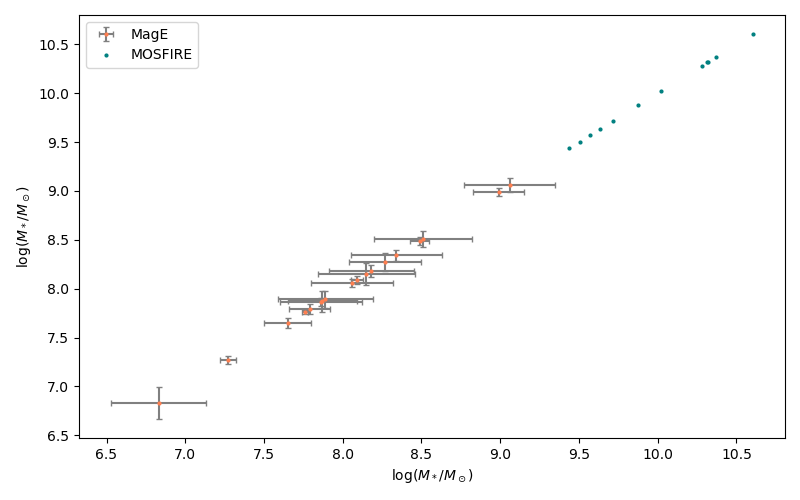

In [330]:
fig = plt.figure(figsize=(8, 5))

mask_sfr_m = ~(np.isinf(np.log10(cecilia['SFR_SED'])) | (cecilia['LMSTAR'] == 99.0))

plt.errorbar(magE.log_M.values, magE.log_M.values, xerr=magE.log_M_err.values,
             yerr=magE.log_SFR_err.values, fmt='o', c='coral', ecolor='grey', ms=2, capsize=2,
            label='MagE')

plt.errorbar(cecilia['LMSTAR'][mask_sfr_m],
             cecilia['LMSTAR'][mask_sfr_m],
             fmt='o', c='teal', ecolor='grey', ms=2, capsize=2,
            label='MOSFIRE')

plt.xlabel(r'$\log(M_*/M_\odot)$')
plt.ylabel(r'$\log(M_*/M_\odot)$')

plt.legend()
plt.tight_layout()
plt.show()

## Compare SDSS VS MAGE

In [17]:
def scatter_plot(fluxes, error, param, setlim):
    fig, axs = plt.subplots(1, 2, figsize=(13, 5))

    flux1, flux2, flux3, flux4 = fluxes
    err1, err2, err3, err4 = error

    axs[0].plot(setlim[0], setlim[0], color='black', linestyle='--')

    for x, y, xerr, yerr, name in zip(flux1, flux2, err1, err2,  magE.ID):
        axs[0].errorbar(x, y, xerr=xerr, yerr=yerr, fmt='o', c='deeppink', ecolor='grey', ms=2, capsize=2)

        if (name == 'J1444+0409') | (name == 'J0950+0042'):
            axs[0].text(x, y+0.01, name, fontsize=6)
        else:
            axs[0].text(x, y-0.01, name, fontsize=6)


    axs[0].set_xlabel(param[0]+ ' (MagE)')
    axs[0].set_ylabel(param[0]+ ' (SDSS)')
    axs[0].set_xlim(setlim[0])
    axs[0].set_ylim(setlim[0])

    axs[1].plot(setlim[1], setlim[1], color='black', linestyle='--')

    for x, y, xerr, yerr, name in zip(flux3, flux4, err3, err4, magE.ID):
        axs[1].errorbar(x, y, xerr=xerr, yerr=yerr, fmt='o', c='deeppink', ecolor='grey', ms=2, capsize=2)

        exception = ((name == 'J0252+0114') | (name == 'J2215-0011') | (name == 'J1448-0110') |
                     (name == 'J0240-0828') | (name == 'J0950+0042') | (name == 'J0305+0040'))
        if exception:
            axs[1].text(x, y+0.03, name, fontsize=6)
        elif name =='J0023-0948':
            axs[1].text(x+0.02, y, name, fontsize=6)
        else:
            axs[1].text(x, y-0.03, name, fontsize=6)


    axs[1].set_xlabel(param[1]+' (MagE)')
    axs[1].set_ylabel(param[1]+' (SDSS)')
    axs[1].set_xlim(setlim[1])
    axs[1].set_ylim(setlim[1])

    plt.tight_layout()
    plt.show()

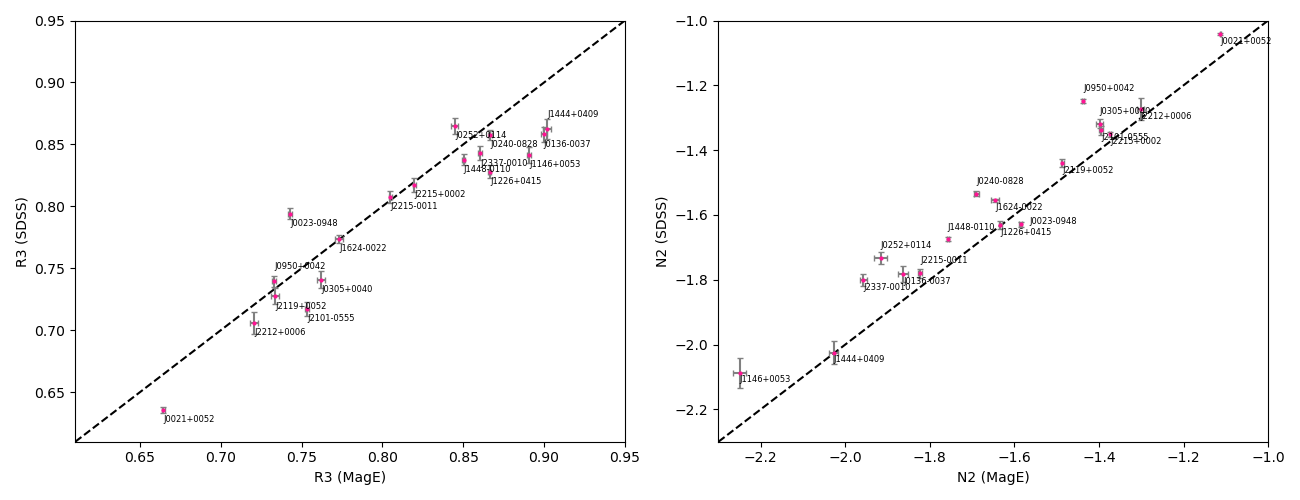

In [18]:
r3n2 = (magE.R3.values, magE.R3_S.values, magE.N2.values, magE.N2_S.values)
r3n2_err = (magE.R3_err.values, magE.R3_S_ERR.values, magE.N2_err.values, magE.N2_S_ERR.values)

scatter_plot(r3n2, r3n2_err, ['R3', 'N2'], setlim=((0.61, 0.95), (-2.3, -1)))

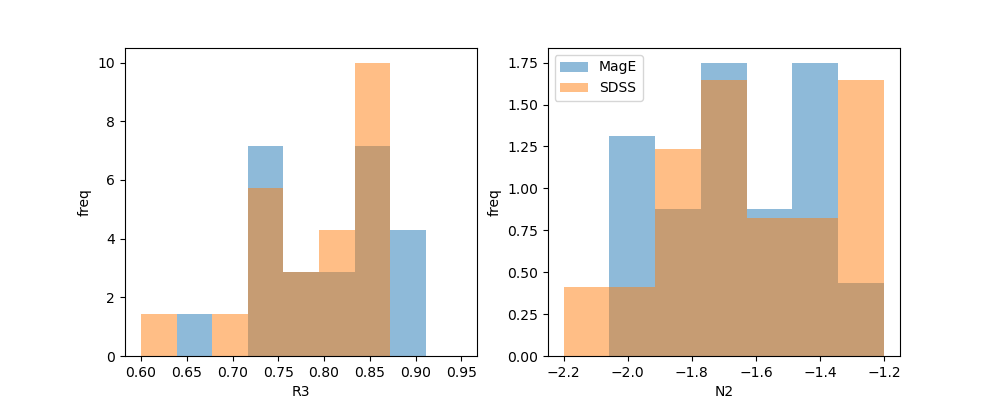

In [19]:
fig, axs= plt.subplots(1, 2,  figsize=(10, 4))
axs[0].hist(r3n2[0], bins=np.linspace(0.60, 0.95, 10), density=True, alpha=0.5, label="MagE")
axs[0].hist(r3n2[1], bins=np.linspace(0.60, 0.95, 10), density=True, alpha=0.5, label="SDSS")
axs[0].set_xlabel('R3')
axs[0].set_ylabel('freq')

axs[1].hist(r3n2[2], bins=np.linspace(-2.2, -1.2, 8), density=True, alpha=0.5, label="MagE")
axs[1].hist(r3n2[3], bins=np.linspace(-2.2, -1.2, 8), density=True, alpha=0.5, label="SDSS")
axs[1].set_xlabel('N2')
axs[1].set_ylabel('freq')

plt.legend()
plt.show()

### Spectra

In [361]:
def normalize_spectra(wavelength, flux, degree, window, bin_max, plot=True):

    def moving_average(arr, window_size):
        i = 0
        smooth_spectra = []
        while i < len(arr) - window_size + 1:
            window1= arr[i : i + window_size]
            smooth_spectrum = round(sum(window1) / window_size, 2)
            smooth_spectra.append(smooth_spectrum)
            i += 1
        return np.array(smooth_spectra)

    def poly_fit(x, *coeffs):
        """Polynomial function."""
        return sum(c * x**i for i, c in enumerate(coeffs))

    bin_flux = moving_average(flux, window)
    bin_wave = moving_average(wavelength, window)

    mask = ~( (bin_flux > bin_max) |( bin_flux < -10)| (bin_wave < 3500) |(bin_wave > 9500) )
    initial_guess = np.random.uniform(-1, 1, degree + 1)

    popt, _ = curve_fit(lambda x, *p: poly_fit(x, *p), bin_wave[mask], bin_flux[mask],
                        p0=initial_guess)

    continuum = poly_fit(wavelength, *popt)
    normalized_flux = flux / continuum

    if plot is True:
        plt.figure(figsize=(10, 6))

        plt.subplot(2, 1, 1)
        plt.plot(wavelength, flux, label='Original Spectrum', color='blue')
        plt.plot(wavelength, continuum, label=f'{degree}-degree Polynomial Fit', color='red', linestyle='--')
        plt.xlabel('Wavelength (Å)')
        plt.ylabel('Flux')
        plt.yscale('log')
        plt.legend()

        plt.subplot(2, 1, 2)
        plt.plot(wavelength, normalized_flux, label='Normalized Spectrum', color='green')
        plt.axhline(1, color='black', linestyle='--', label='Continuum Level')
        plt.xlabel('Wavelength (Å)')
        plt.ylabel('Normalized Flux')
        plt.legend()
        plt.yscale('log')
        plt.tight_layout()
        plt.show()

    return normalized_flux


def save_data(x, y, x_err, y_err):
    distance = np.abs(x - y)
    normalized_distance = distance / y_err
    mask_distance = (normalized_distance > 5)
    names= magE.ID.values[mask_distance]
    data_magE = {}
    data_sdss = {}
    for i in names:
        print(f'Reading spectra from {i}')
        magE_spec = pd.read_csv('nava_data/analogs/specs/final_spec/' +
                                i[:5] + '.csv')
        sdss_spec= fits.open('MPA-JHU/spectra/' + i + '.fits')
        lines_name = sdss_spec[3].data['LINENAME'][6:]
        lines_wave = sdss_spec[3].data['LINEWAVE'][6:]*(1 + sdss_spec[3].data['LINEZ'][6:])

        wave_magE = magE_spec.wave.values
        flux_magE = magE_spec.flux.values*1e17
        wave_sdss = np.array([10**(t[1]) for t in sdss_spec[1].data])
        flux_sdss = np.array([t[0] for t in sdss_spec[1].data])
        print('Saving')
        data_magE[i] = (wave_magE, flux_magE, lines_name, lines_wave)
        data_sdss[i] = (wave_sdss, flux_sdss, lines_name, lines_wave)

    return data_magE, data_sdss, names


def plot_spectra(spectra1, spectra2, name, line_name, line_wave,
                 degree=(3, 3), windows=(10, 10), plot=False):
    fig = plt.figure(constrained_layout=True, figsize=(10, 6))
    axs = fig.subplot_mosaic([['Left', 'TopRight'],['Left', 'BottomRight']],
                              gridspec_kw={'width_ratios':[2, 1]})
    axs['Left'].set_title('Plot on Left')
    wave1, flux1, name1 = spectra1
    wave2, flux2, name2 = spectra2
    axs['Left'].plot(wave1, flux1, c='teal', label=name1)
    axs['Left'].plot(wave2, flux2, c='deeppink', label=name2)
    axs['Left'].set_xlabel('Wavelength (Angstroms)')
    axs['Left'].set_ylabel(r'Normalized spectra')
    axs['Left'].set_title(name)
    axs['Left'].legend(markerscale=5, frameon=False, bbox_to_anchor=(0.2, 0.95),
           loc='upper right', borderaxespad=0)
    #axs['Left'].set_xlim(3800, 8000)
    axs['Left'].set_ylim(1e-3, 1e3)

    axs['Left'].minorticks_on()
    axs['Left'].tick_params(which='major', length=10, width=1.2, direction='in')
    axs['Left'].tick_params(which='minor', length=5, width=1.2, direction='in')
    axs['Left'].xaxis.set_ticks_position('both')
    axs['Left'].yaxis.set_ticks_position('both')
    axs['Left'].set_yscale('log')
    if line_wave is not None and line_name is not None:
        for wavelength1, label in zip(line_wave, line_name):
            axs['Left'].axvline(x=wavelength1, color='gray',
                                linestyle='--', alpha=0.2)
            axs['Left'].text(wavelength1, 1e-2, label, rotation=90,
                             verticalalignment='bottom', horizontalalignment='center',
                             color='black', fontsize=8)

    axs['TopRight'].set_title(r'[OIII] $\lambda\lambda$ 4959 5007')
    xlim = 0.5*(line_wave[line_name == '[O_III] 4959'] +
                 line_wave[line_name == '[O_III] 5007'] )
    wave_O3 = (line_wave[line_name == '[O_III] 5007'])
    resta_O3 = np.abs(wave1 - wave_O3)
    flux_O3 = flux1[np.argmin(resta_O3)]
    axs['TopRight'].plot(wave1, flux1, c='teal', label=name1)
    axs['TopRight'].plot(wave2, flux2, c='deeppink', label=name2)
    axs['TopRight'].set_xlim(xlim-100, xlim+100)
    axs['TopRight'].set_ylim(0.1, flux_O3+100)
    axs['TopRight'].set_yscale('log')

    axs['BottomRight'].set_title(r'$h_{\beta}$')
    xlim1 = line_wave[line_name == 'H_beta']
    wave_hb = (line_wave[line_name == 'H_beta'])
    resta_hb = np.abs(wave1 - wave_hb)
    flux_hb = flux1[np.argmin(resta_hb)]
    axs['BottomRight'].plot(wave1, flux1, c='teal', label=name1)
    axs['BottomRight'].plot(wave2, flux2, c='deeppink', label=name2)
    axs['BottomRight'].set_xlim(xlim1-50, xlim1+50)
    axs['BottomRight'].set_ylim(0.1, flux_hb+10)
    axs['BottomRight'].set_yscale('log')
    plt.show()

In [362]:
norm_magE, norm_sdss, names = save_data(magE.R3.values, magE.R3_S.values,
                magE.R3_err.values, magE.R3_S_ERR.values)

Reading spectra from J0021+0052
Saving
Reading spectra from J0023-0948
Saving
Reading spectra from J0136-0037
Saving
Reading spectra from J1146+0053
Saving
Reading spectra from J1226+0415
Saving
Reading spectra from J1444+0409
Saving
Reading spectra from J2101-0555
Saving


Normalizing MagE
Normalizing SDSS


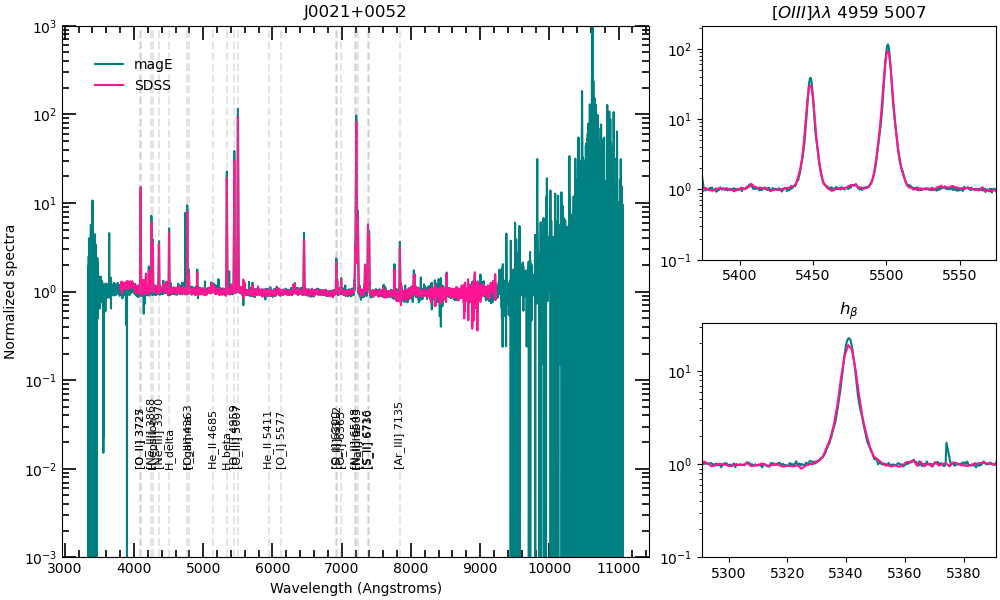

In [360]:
name = names[0]

degree = (3, 3)
windows = (30, 2)
plot = False
bin_max = (40, 35)

print('Normalizing MagE')
norm_flux1 = normalize_spectra(norm_magE[name][0], norm_magE[name][1], degree[0],
                               windows[0], 40,  plot=plot)
print('Normalizing SDSS')
norm_flux2 = normalize_spectra(norm_sdss[name][0], norm_sdss[name][1], degree[1],
                               windows[1], 35, plot=plot)

plot_spectra([norm_magE[name][0], norm_flux1, 'magE'],
            [norm_sdss[name][0], norm_flux2, 'SDSS'],
            name, norm_magE[name][2], norm_magE[name][3])

Normalizing MagE
Normalizing SDSS


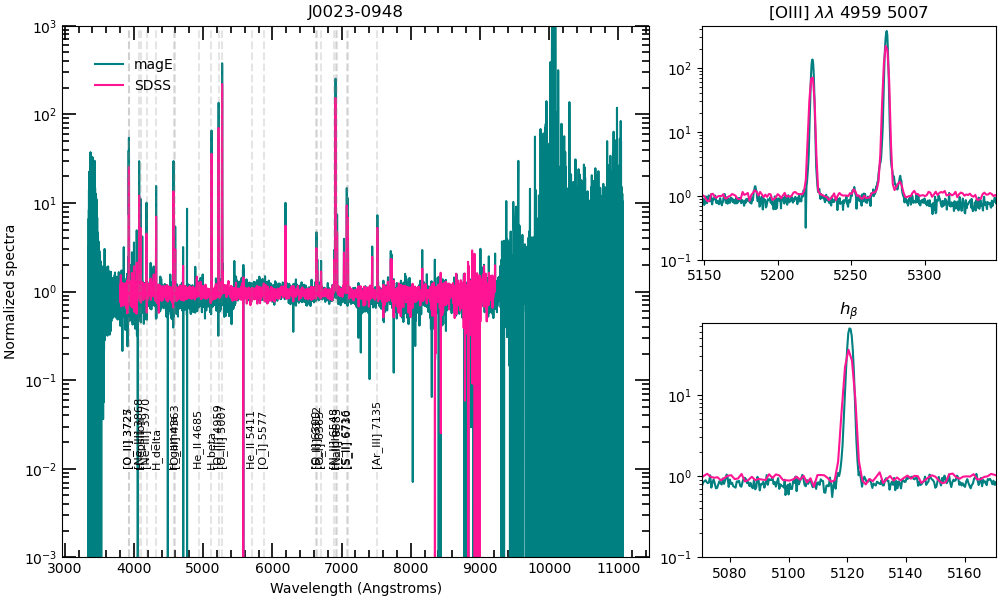

In [378]:
name = names[1]

degree = (3, 3)
windows = (30, 2)
plot = False
bin_max = (30, 30)

print('Normalizing MagE')
norm_flux1 = normalize_spectra(norm_magE[name][0], norm_magE[name][1], degree[0],
                               windows[0], 30,  plot=plot)
print('Normalizing SDSS')
norm_flux2 = normalize_spectra(norm_sdss[name][0], norm_sdss[name][1], degree[1],
                               windows[1], 30, plot=plot)

plot_spectra([norm_magE[name][0], norm_flux1, 'magE'],
            [norm_sdss[name][0], norm_flux2, 'SDSS'],
            name, norm_magE[name][2], norm_magE[name][3])

Normalizing MagE


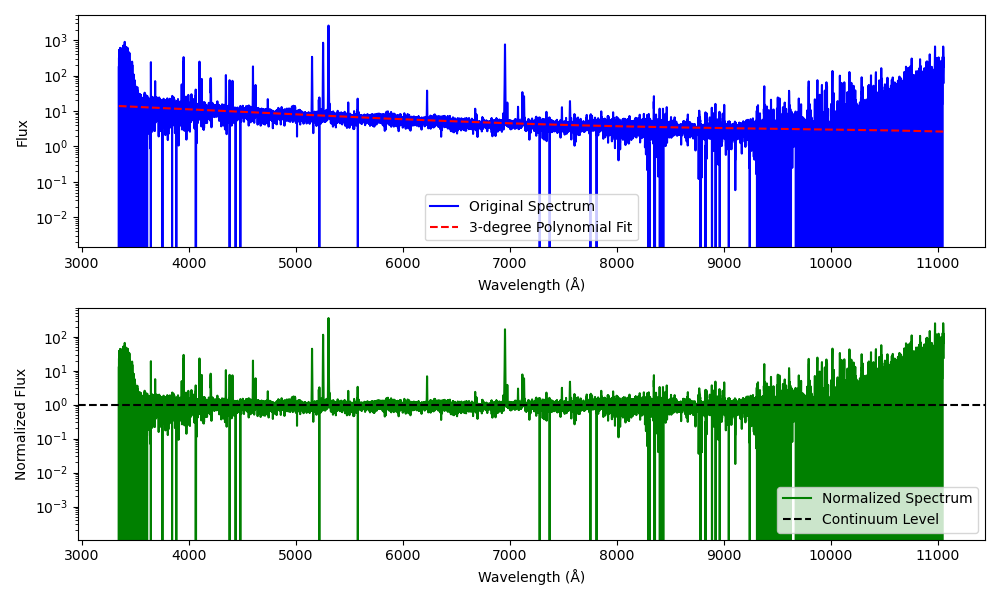

Normalizing SDSS


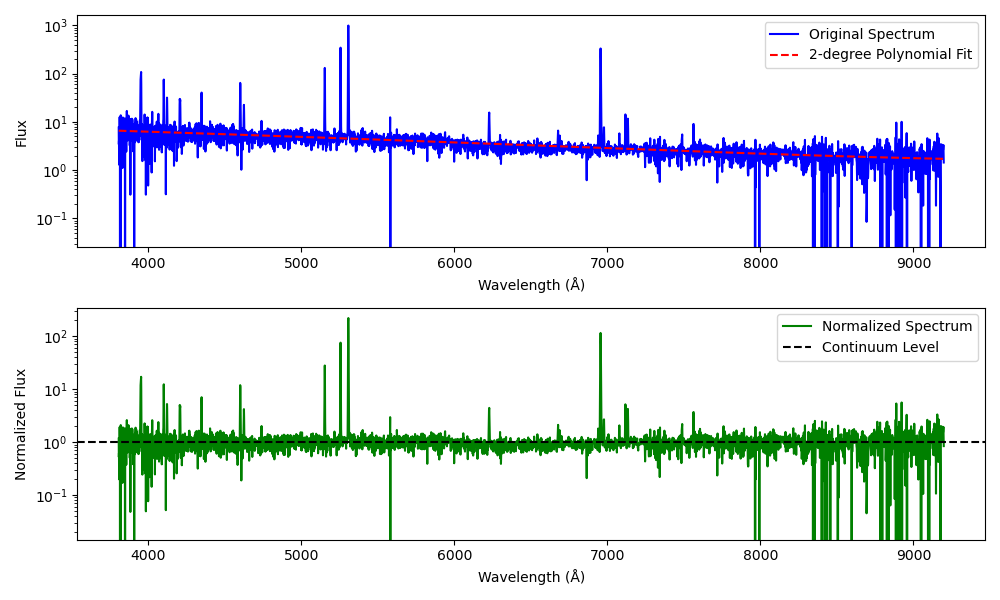

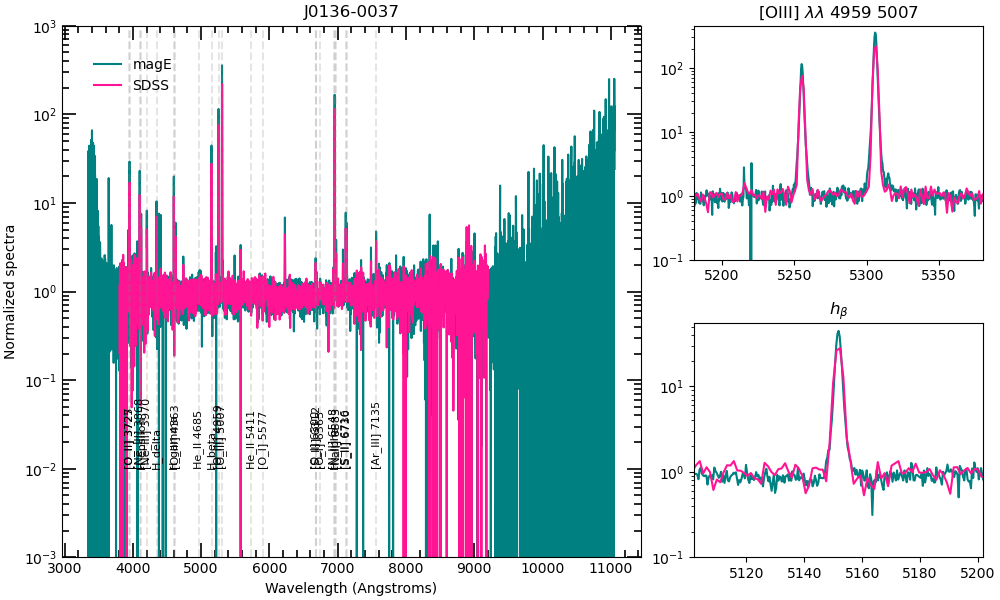

In [373]:
name = names[2]

degree = (3, 2)
windows = (30, 3)
plot = True
bin_max = True

print('Normalizing MagE')
norm_flux1 = normalize_spectra(norm_magE[name][0], norm_magE[name][1], degree[0],
                               windows[0], 30,  plot=plot)
print('Normalizing SDSS')
norm_flux2 = normalize_spectra(norm_sdss[name][0], norm_sdss[name][1], degree[1],
                               windows[1], 20, plot=plot)

plot_spectra([norm_magE[name][0], norm_flux1, 'magE'],
            [norm_sdss[name][0], norm_flux2, 'SDSS'],
            name, norm_magE[name][2], norm_magE[name][3])

Normalizing MagE
Normalizing SDSS


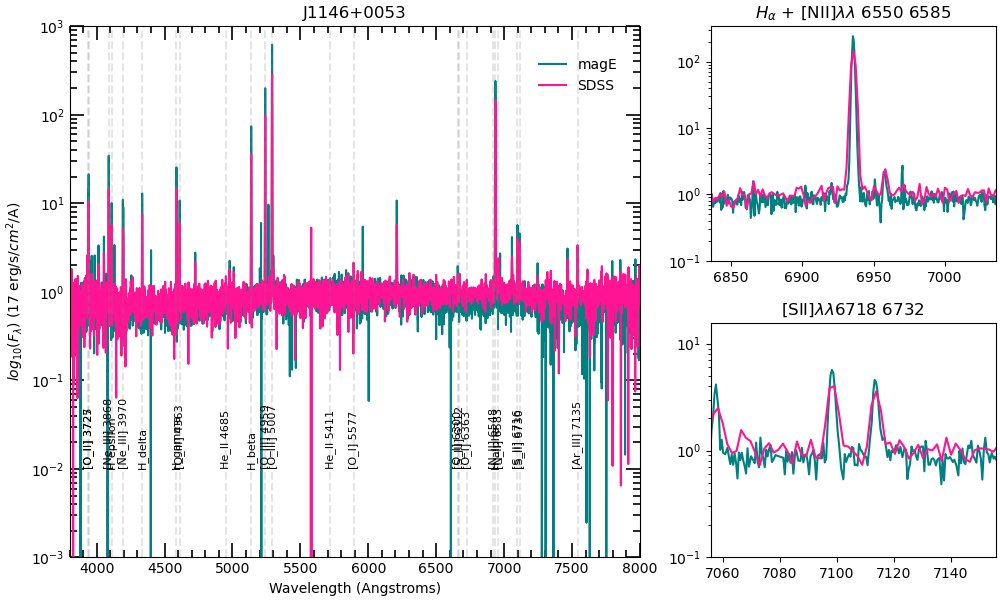

In [26]:
name = names[3]

degree = (3, 3)
windows = (8, 2)
plot = False
bin_max = 200

print('Normalizing MagE')
norm_flux1 = normalize_spectra(norm_magE[name][0], norm_magE[name][1], degree[0],
                               windows[0], 100,  plot=plot)
print('Normalizing SDSS')
norm_flux2 = normalize_spectra(norm_sdss[name][0], norm_sdss[name][1], degree[1],
                               windows[1], 100, plot=plot)

plot_spectra([norm_magE[name][0], norm_flux1, 'magE'],
            [norm_sdss[name][0], norm_flux2, 'SDSS'],
            name, norm_magE[name][2], norm_magE[name][3])

Normalizing MagE
Normalizing SDSS


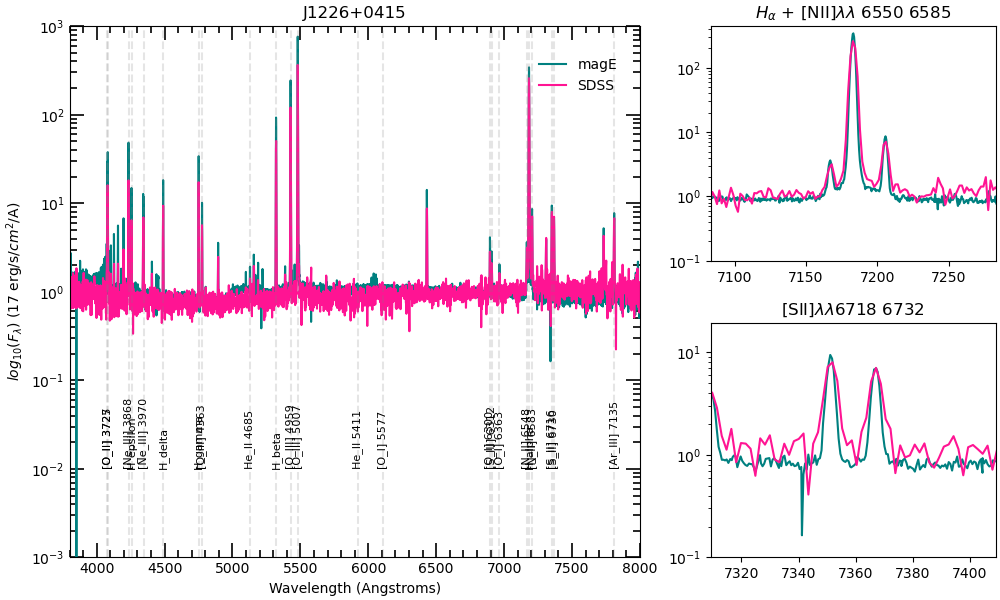

In [27]:
name = names[4]

degree = (3, 2)
windows = (10, 2)
plot = False
bin_max = 200

print('Normalizing MagE')
norm_flux1 = normalize_spectra(norm_magE[name][0], norm_magE[name][1], degree[0],
                               windows[0], 30,  plot=plot)
print('Normalizing SDSS')
norm_flux2 = normalize_spectra(norm_sdss[name][0], norm_sdss[name][1], degree[1],
                               windows[1], 100, plot=plot)

plot_spectra([norm_magE[name][0], norm_flux1, 'magE'],
            [norm_sdss[name][0], norm_flux2, 'SDSS'],
            name, norm_magE[name][2], norm_magE[name][3])

Normalizing MagE
Normalizing SDSS


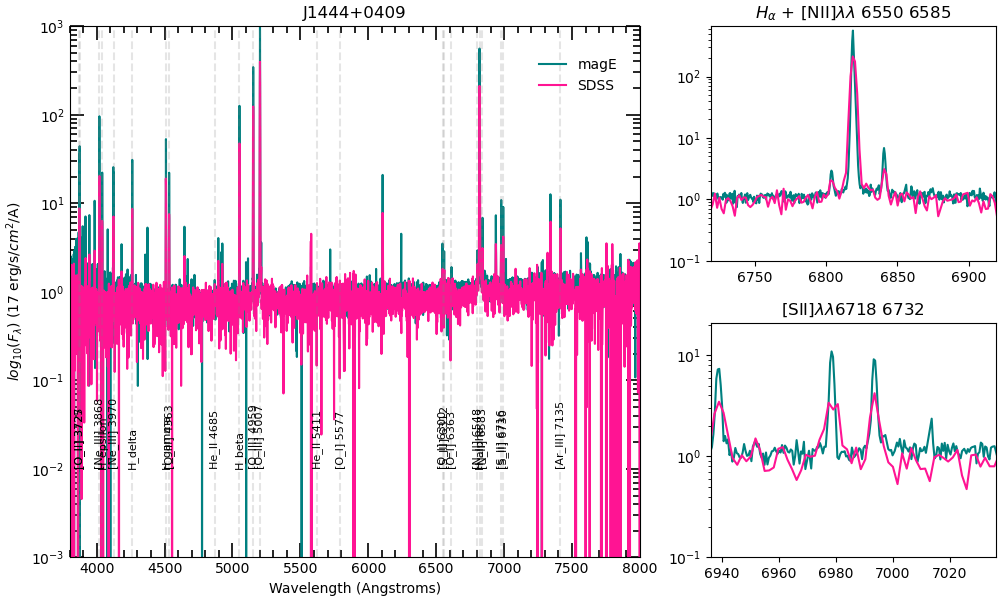

In [28]:
name = names[5]

degree = (2, 2)
windows = (100, 2)
plot = False
bin_max = 200

print('Normalizing MagE')
norm_flux1 = normalize_spectra(norm_magE[name][0], norm_magE[name][1], degree[0],
                               windows[0], 10,  plot=plot)
print('Normalizing SDSS')
norm_flux2 = normalize_spectra(norm_sdss[name][0], norm_sdss[name][1], degree[1],
                               windows[1], 100, plot=plot)

plot_spectra([norm_magE[name][0], norm_flux1, 'magE'],
             [norm_sdss[name][0], norm_flux2, 'SDSS'],
             name, norm_magE[name][2], norm_magE[name][3])

Normalizing MagE
Normalizing SDSS


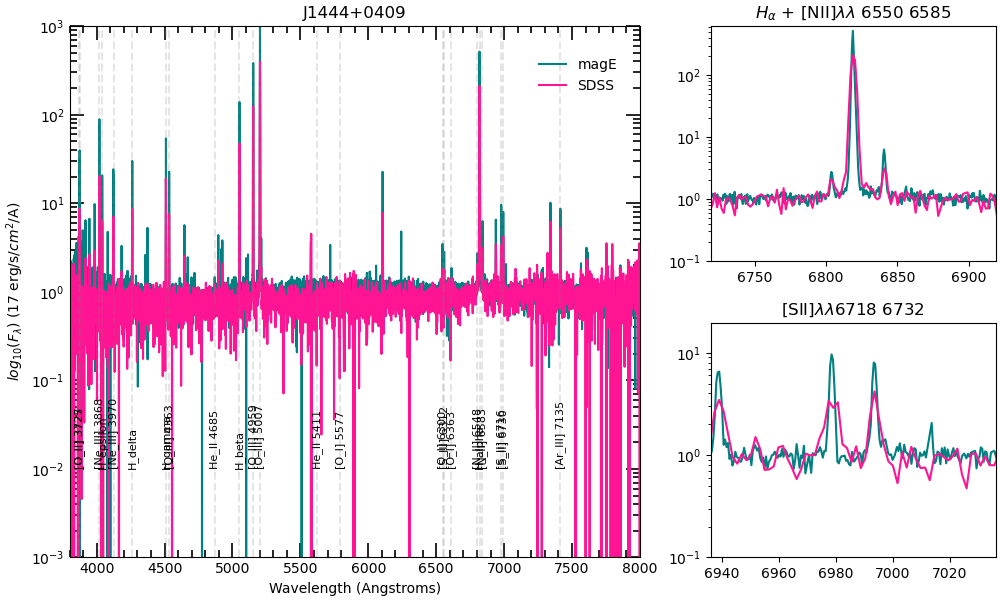

In [29]:
name = names[5]

degree = (3, 2)
windows = (100, 2)
plot = False
bin_max = 200

print('Normalizing MagE')
norm_flux1 = normalize_spectra(norm_magE[name][0], norm_magE[name][1], degree[0],
                               windows[0], 10,  plot=plot)
print('Normalizing SDSS')
norm_flux2 = normalize_spectra(norm_sdss[name][0], norm_sdss[name][1], degree[1],
                               windows[1], 100, plot=plot)

plot_spectra([norm_magE[name][0], norm_flux1, 'magE'],
             [norm_sdss[name][0], norm_flux2, 'SDSS'],
             name, norm_magE[name][2], norm_magE[name][3])

## by hand stimation

In [101]:
sdss_spec = fits.open('spec-0390-51900-0445(1).fits')
magE_spec = pd.read_csv('nava_data/analogs/specs/final_spec/J0021.csv')

lines_name = sdss_spec[3].data['LINENAME'][6:]
lines_wave = sdss_spec[3].data['LINEWAVE'][6:]*(1 + sdss_spec[3].data['LINEZ'][6:])

wave_magE = magE_spec.wave.values
flux_magE = magE_spec.flux.values*1e17
wave_sdss = np.array([10**(t[1]) for t in sdss_spec[1].data])
flux_sdss = np.array([t[0] for t in sdss_spec[1].data])

In [389]:
sdss_spec[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TAI     =        4483446313.96 / 1st row - Number of seconds since Nov 17 1858  
RA      =            5.222923  / 1st row - Right ascension of telescope boresigh
DEC     =           -0.034972  / 1st row - Declination of telescope boresight (d
EQUINOX =              2000.00 /                                                
RADECSYS= 'FK5     '           /                                                
TAIHMS  = '01:57:11.08'        / 1st row - TAI time (HH:MM:SS.SS) (TAI-UT = appr
TIMESYS = 'tai     '           / TAI, not UTC                                   
MJD     =                51900 / MJD of observation                             
MJDLIST = '51885 51899 51900

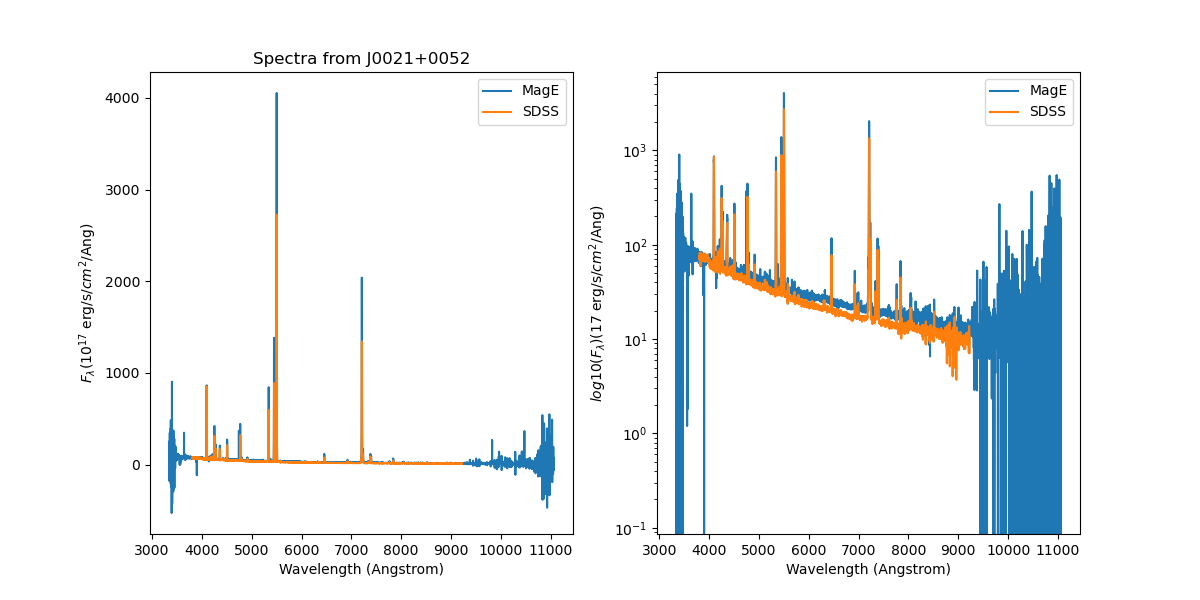

In [107]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(wave_magE, flux_magE, label='MagE')
ax[0].plot(wave_sdss, flux_sdss, label='SDSS')
ax[0].set_xlabel('Wavelength (Angstrom)')
ax[0].set_ylabel(r'$F_{\lambda}$($10^{17}$ erg/s/$cm^{2}$/Ang)')
ax[0].legend()
ax[0].set_title('Spectra from J0021+0052')
ax[1].plot(wave_magE, flux_magE, label='MagE')
ax[1].plot(wave_sdss, flux_sdss, label='SDSS')
ax[1].set_xlabel('Wavelength (Angstrom)')
ax[1].set_ylabel(r'$log10(F_{\lambda})$(17 erg/s/$cm^{2}$/Ang)')
ax[1].set_yscale('log')
ax[1].legend()

plt.show()

In [364]:
def moving_average(arr, window_size):
    i = 0
    smooth_spectra = []
    while i < len(arr) - window_size + 1:
        window1= arr[i : i + window_size]
        smooth_spectrum = round(sum(window1) / window_size, 2)
        smooth_spectra.append(smooth_spectrum)
        i += 1
    return np.array(smooth_spectra)

num = 30
bin_flux_mage = moving_average(flux_magE, num)
bin_wave_mage = moving_average(wave_magE, num)

num2 = 2
bin_flux_sdss = moving_average(flux_sdss, num2)
bin_wave_sdss = moving_average(wave_sdss, num2)


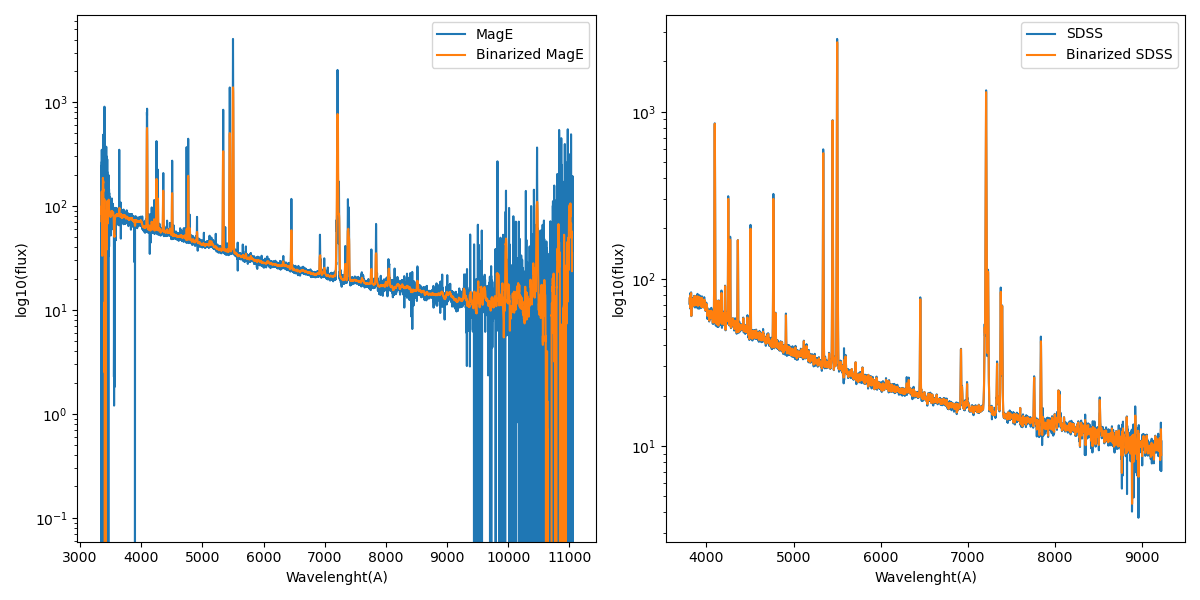

In [365]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(wave_magE, flux_magE, label='MagE')
ax[0].plot(bin_wave_mage, bin_flux_mage, label='Binarized MagE')
ax[0].set_xlabel('Wavelenght(A)')
ax[0].set_ylabel("log10(flux)")
ax[0].legend()
ax[0].set_yscale('log')

ax[1].plot(wave_sdss, flux_sdss, label='SDSS')
ax[1].plot(bin_wave_sdss, bin_flux_sdss, label='Binarized SDSS')
ax[1].set_xlabel('Wavelenght(A)')
ax[1].set_ylabel("log10(flux)")
ax[1].legend()
ax[1].set_yscale('log')
plt.tight_layout()
plt.show()

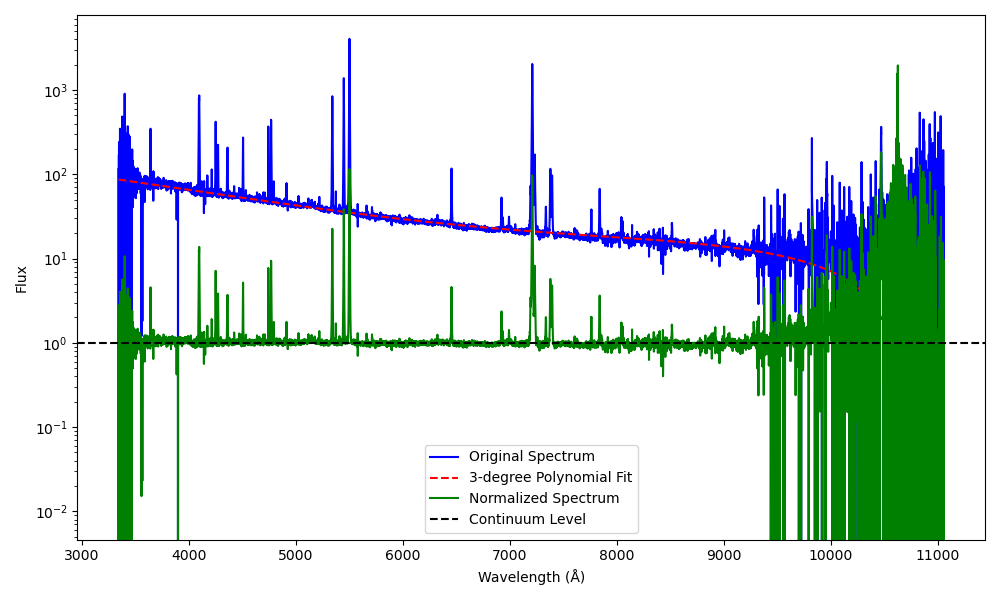

In [299]:
def poly_fit(x, *coeffs):
    """Polynomial function."""
    return sum(c * x**i for i, c in enumerate(coeffs))

num = 30
bin_flux_mage = moving_average(flux_magE, num)
bin_wave_mage = moving_average(wave_magE, num)


mask_mage = ~( (bin_flux_mage > 40) | ( bin_flux_mage < -10) |
         (bin_wave_mage < 3500) | (bin_wave_mage > 9500) )

degree = 3
initial_guess = np.random.uniform(-1, 1, degree + 1)

popt1, _ = curve_fit(lambda x, *p: poly_fit(x, *p), bin_wave_mage[mask_mage],
                     bin_flux_mage[mask_mage], p0=initial_guess)

continuum_mage = poly_fit(wave_magE, *popt1)
normalized_flux_mage = flux_magE / continuum_mage


plt.figure(figsize=(10, 6))

plt.plot(wave_magE, flux_magE, label='Original Spectrum', color='blue')
plt.plot(wave_magE, continuum_mage, label=f'{degree}-degree Polynomial Fit', color='red', linestyle='--')
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.plot(wave_magE, normalized_flux_mage, label='Normalized Spectrum', color='green')
plt.axhline(1, color='black', linestyle='--', label='Continuum Level')
plt.legend()
plt.yscale('log')
plt.tight_layout()
plt.show()


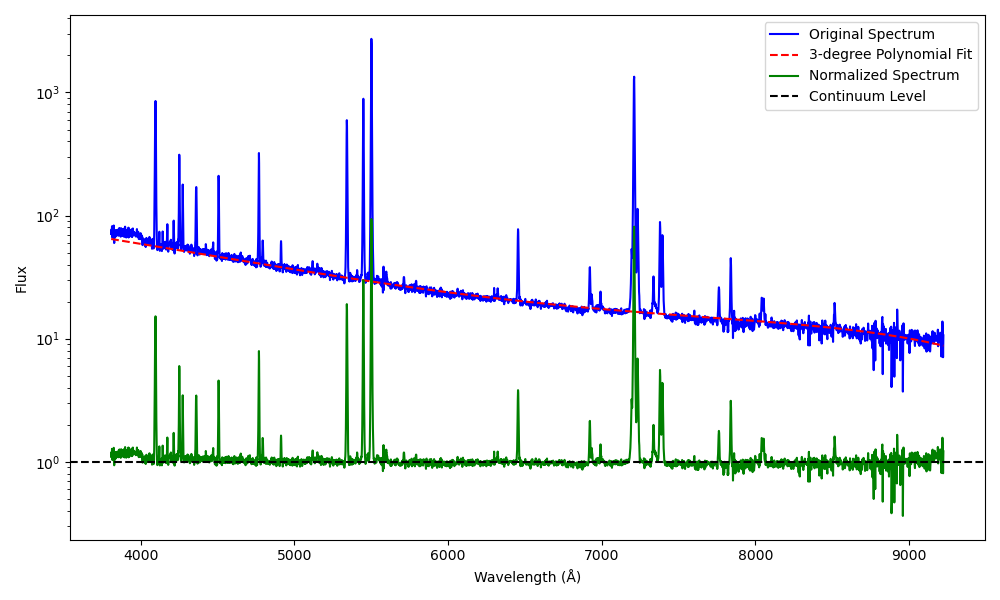

In [295]:
num2 = 2
bin_flux_sdss = moving_average(flux_sdss, num2)
bin_wave_sdss = moving_average(wave_sdss, num2)

mask_sdss = ~((bin_flux_sdss > 35) | ( bin_flux_sdss < -1) )

popt2, _ = curve_fit(lambda x, *p: poly_fit(x, *p), bin_wave_sdss[mask_sdss],
                     bin_flux_sdss[mask_sdss], p0=initial_guess)

continuum_sdss = poly_fit(wave_sdss, *popt2)
normalized_flux_sdss = flux_sdss / continuum_sdss

plt.figure(figsize=(10, 6))

plt.plot(wave_sdss, flux_sdss, label='Original Spectrum', color='blue')
plt.plot(wave_sdss, continuum_sdss, label=f'{degree}-degree Polynomial Fit', color='red', linestyle='--')
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux')
plt.plot(wave_sdss, normalized_flux_sdss, label='Normalized Spectrum', color='green')
plt.axhline(1, color='black', linestyle='--', label='Continuum Level')
plt.legend()
plt.yscale('log')
plt.tight_layout()
plt.show()


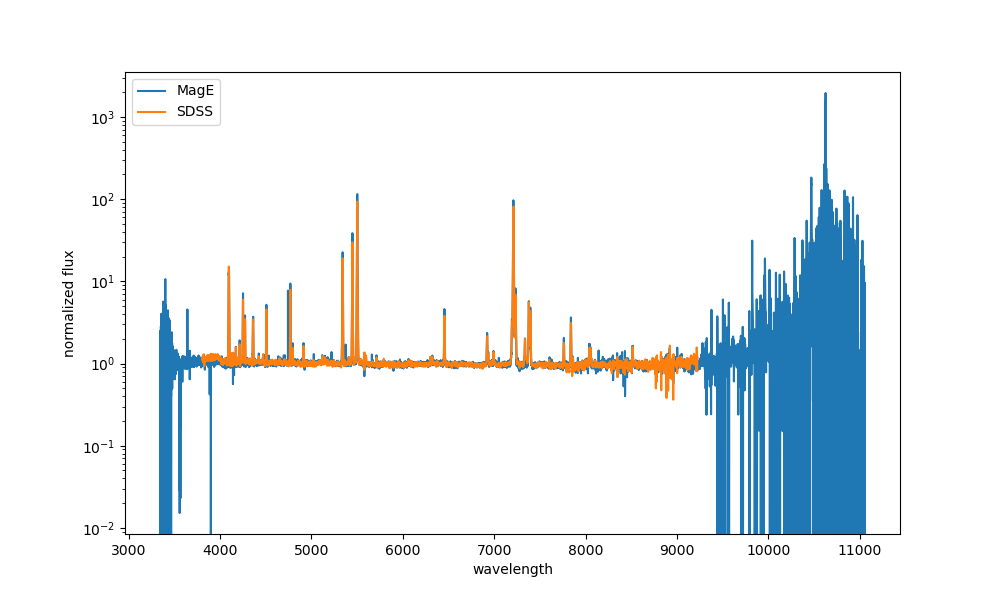

In [300]:
fig = plt.figure(figsize=(10, 6))
plt.plot(wave_magE, normalized_flux_mage, label='MagE')
plt.plot(wave_sdss, normalized_flux_sdss, label='SDSS')
plt.legend()
plt.xlabel('wavelength')
plt.ylabel('normalized flux')
plt.yscale('log')
plt.show()

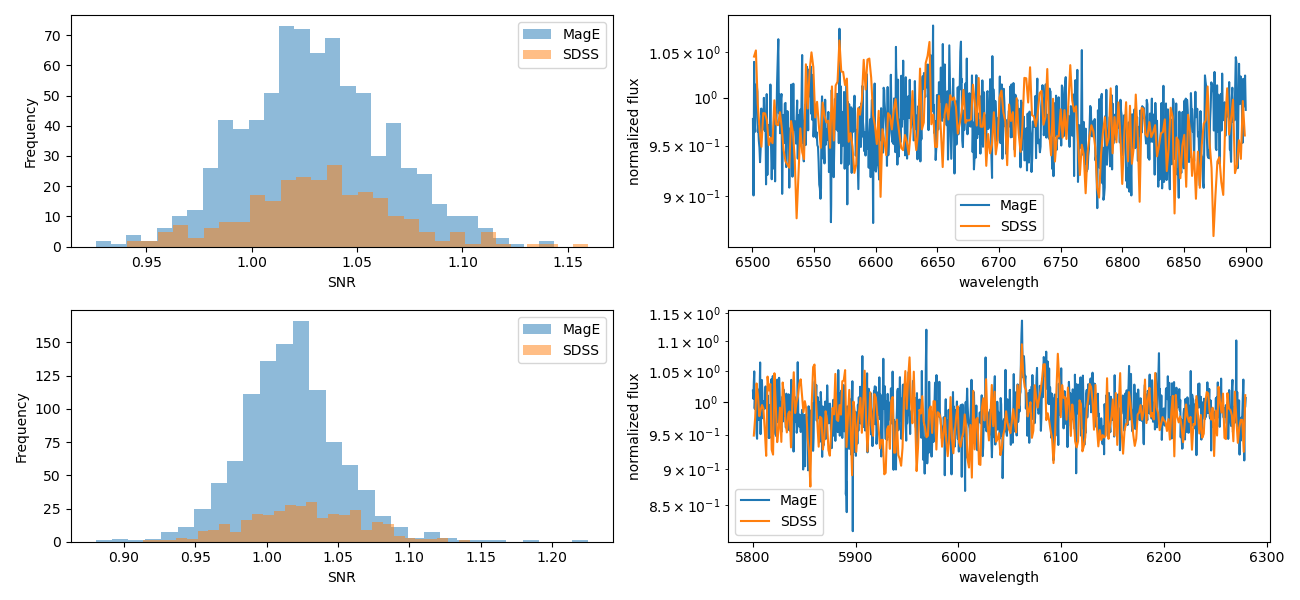

In [301]:
# SNR
full_SNR_magE = continuum_mage / flux_magE
full_SNR_sdss = continuum_sdss / flux_sdss

mask_SNR_magE1 = ( (wave_magE > 6500) & (wave_magE < 6900) )
mask_SNR_sdss1 = ( (wave_sdss > 6500) & (wave_sdss < 6900) )

mask_SNR_magE2 = ( (wave_magE > 5800) & (wave_magE < 6280) )
mask_SNR_sdss2 = ( (wave_sdss > 5800) & (wave_sdss < 6280) )

SNR_magE1 = full_SNR_magE[mask_SNR_magE1]
SNR_sdss1 = full_SNR_sdss[mask_SNR_sdss1]

SNR_magE2 = full_SNR_magE[mask_SNR_magE2]
SNR_sdss2 = full_SNR_sdss[mask_SNR_sdss2]

fig, ax = plt.subplots(2, 2, figsize=(13, 6))
ax[0, 0].hist(SNR_magE1, bins=30, alpha=0.5, label='MagE')
ax[0,0].hist(SNR_sdss1, bins=30, alpha=0.5, label='SDSS')
ax[0,0].set_xlabel('SNR')
ax[0,0].set_ylabel('Frequency')
ax[0,0].legend()

ax[0,1].plot(wave_magE[mask_SNR_magE1], normalized_flux_mage[mask_SNR_magE1],
           label='MagE')
ax[0,1].plot(wave_sdss[mask_SNR_sdss1], normalized_flux_sdss[mask_SNR_sdss1],
           label='SDSS')
ax[0,1].legend()
ax[0,1].set_xlabel('wavelength')
ax[0,1].set_ylabel('normalized flux')
ax[0,1].set_yscale('log')

ax[1, 0].hist(SNR_magE2, bins=30, alpha=0.5, label='MagE')
ax[1,0].hist(SNR_sdss2, bins=30, alpha=0.5, label='SDSS')
ax[1,0].set_xlabel('SNR')
ax[1,0].set_ylabel('Frequency')
ax[1,0].legend()

ax[1,1].plot(wave_magE[mask_SNR_magE2], normalized_flux_mage[mask_SNR_magE2],
           label='MagE')
ax[1,1].plot(wave_sdss[mask_SNR_sdss2], normalized_flux_sdss[mask_SNR_sdss2],
           label='SDSS')
ax[1,1].legend()
ax[1,1].set_xlabel('wavelength')
ax[1,1].set_ylabel('normalized flux')
ax[1,1].set_yscale('log')
plt.tight_layout()
plt.show()

Normalizing MagE
Normalizing SDSS


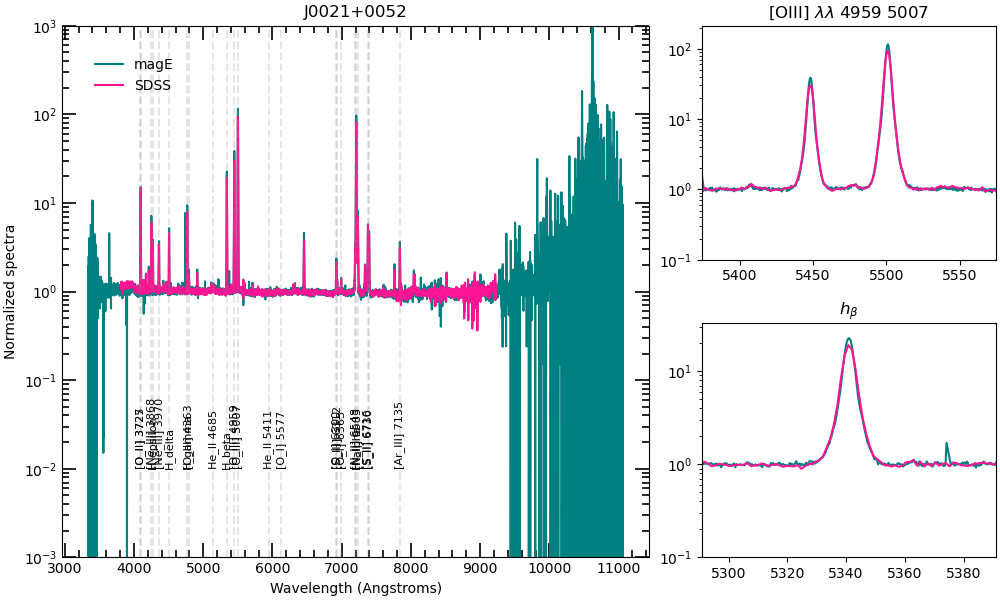

In [363]:
name = names[0]

degree = (3, 3)
windows = (30, 2)
plot = False
bin_max = (40, 35)

print('Normalizing MagE')
norm_flux1 = normalize_spectra(norm_magE[name][0], norm_magE[name][1], degree[0],
                               windows[0], 40,  plot=plot)
print('Normalizing SDSS')
norm_flux2 = normalize_spectra(norm_sdss[name][0], norm_sdss[name][1], degree[1],
                               windows[1], 35, plot=plot)

plot_spectra([norm_magE[name][0], norm_flux1, 'magE'],
            [norm_sdss[name][0], norm_flux2, 'SDSS'],
            name, norm_magE[name][2], norm_magE[name][3])